# 고객 데이터 분석
- 고객 분류 
- 매출량 예측 모델 생성

## Data Import

In [2]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/%5BDArt-B%205%EA%B8%B0%5D%20Global_Supermarket.csv')
data.head()

customer_id     customer_name customer_segment        order_id   order_city  \
0   LS-172304  Lycoris Saunders         Consumer  CA-2019-130813  Los Angeles   
1   MV-174854     Mark Van Huff         Consumer  CA-2019-148614  Los Angeles   
2   CS-121304      Chad Sievert         Consumer  CA-2019-118962  Los Angeles   
3   CS-121304      Chad Sievert         Consumer  CA-2019-118962  Los Angeles   
4   AP-109154    Arthur Prichep         Consumer  CA-2019-146969  Los Angeles   

  oreder_region  order_date  order_year  order_weeknum  quantity  ...  \
0          West  2019-01-07        2019              2         3  ...   
1          West  2019-01-21        2019              4         2  ...   
2          West  2019-08-05        2019             32         3  ...   
3          West  2019-08-05        2019             32         2  ...   
4          West  2019-09-29        2019             40         1  ...   

   discount         category sub_category  market_country  market_area  \
0       0.0  Office Supplies        Paper   United States           US   
1       0.0  Office Supplies        Paper   United States           US   
2       0.0  Office Supplies        Paper   United States           US   
3       0.0  Office Supplies        Paper   United States           US   
4       0.0  Office Supplies        Paper   United States           US   

  market_city   ship_date       ship_mode shipping_cost row_id  
0  California  2019-01-09    Second Class          4.37  36624  
1  California  2019-01-26  Standard Class          0.94  37033  
2  California  2019-08-09  Standard Class          1.81  31468  
3  California  2019-08-09  Standard Class          4.59  31469  
4  California  2019-10-03  Standard Class          1.32  32440  

[5 rows x 24 columns]

In [3]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes,columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) *100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    
    return summ
summary(data) 

data shape: (51290, 24)


data type  #missing  %missing  #unique       min       max
customer_id         object         0       0.0     4873       NaN       NaN
customer_name       object         0       0.0      795       NaN       NaN
customer_segment    object         0       0.0        3       NaN       NaN
order_id            object         0       0.0    25035       NaN       NaN
order_city          object         0       0.0     3636       NaN       NaN
oreder_region       object         0       0.0       13       NaN       NaN
order_date          object         0       0.0     1430       NaN       NaN
order_year           int64         0       0.0        4    2019.0    2022.0
order_weeknum        int64         0       0.0       53       1.0      53.0
quantity             int64         0       0.0       14       1.0      14.0
sales                int64         0       0.0     2246       0.0   22638.0
product_id          object         0       0.0    10292       NaN       NaN
product_name        object         0       0.0     3788       NaN       NaN
profit             float64         0       0.0    24575 -6599.978  8399.976
discount           float64         0       0.0       27       0.0      0.85
category            object         0       0.0        3       NaN       NaN
sub_category        object         0       0.0       17       NaN       NaN
market_country      object         0       0.0      147       NaN       NaN
market_area         object         0       0.0        7       NaN       NaN
market_city         object         0       0.0     1094       NaN       NaN
ship_date           object         0       0.0     1464       NaN       NaN
ship_mode           object         0       0.0        4       NaN       NaN
shipping_cost      float64         0       0.0    16877     0.002    933.57
row_id               int64         0       0.0    51290       1.0   51290.0

In [4]:
data.rename(columns={'oreder_region':'order_region'},inplace=True)
data.columns

Index(['customer_id', 'customer_name', 'customer_segment', 'order_id',
       'order_city', 'order_region', 'order_date', 'order_year',
       'order_weeknum', 'quantity', 'sales', 'product_id', 'product_name',
       'profit', 'discount', 'category', 'sub_category', 'market_country',
       'market_area', 'market_city', 'ship_date', 'ship_mode', 'shipping_cost',
       'row_id'],
      dtype='object')

In [5]:
data.shape

(51290, 24)

## EDA

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [7]:
data['pre_sales'] = data['sales'] / (1-data['discount'])
data['uni_cost'] = data['pre_sales'] / data['quantity']

### 1. Customer Information

In [8]:
print('Unique 고객 ID:',data['customer_id'].nunique())
print('Unique 고객 이름:',data['customer_name'].nunique())

Unique 고객 ID: 4873
Unique 고객 이름: 795


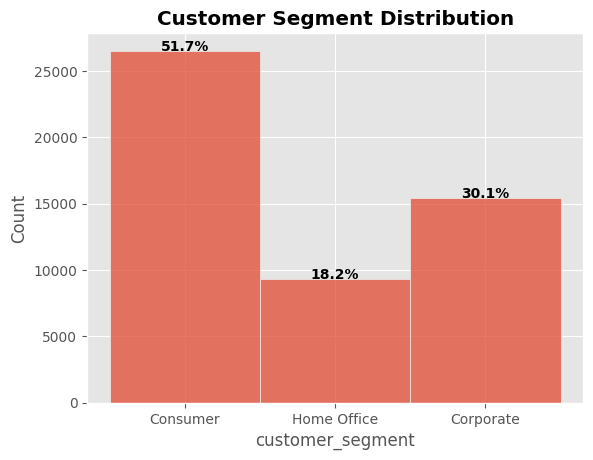

In [9]:
ax = sns.histplot(data['customer_segment'], stat='count')
plt.title('Customer Segment Distribution', loc='center',weight='bold')

# 각 바의 상단 중앙에 비율 표시
total = len(data['customer_segment'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center",weight='bold')

### 2. Order Information

In [10]:
print('Unqiue order_id:',data['order_id'].nunique())
print('중복된 데이터 갯수: ',data.duplicated().sum())

Unqiue order_id: 25035
중복된 데이터 갯수:  0


#### 2-1. 지역별 특성

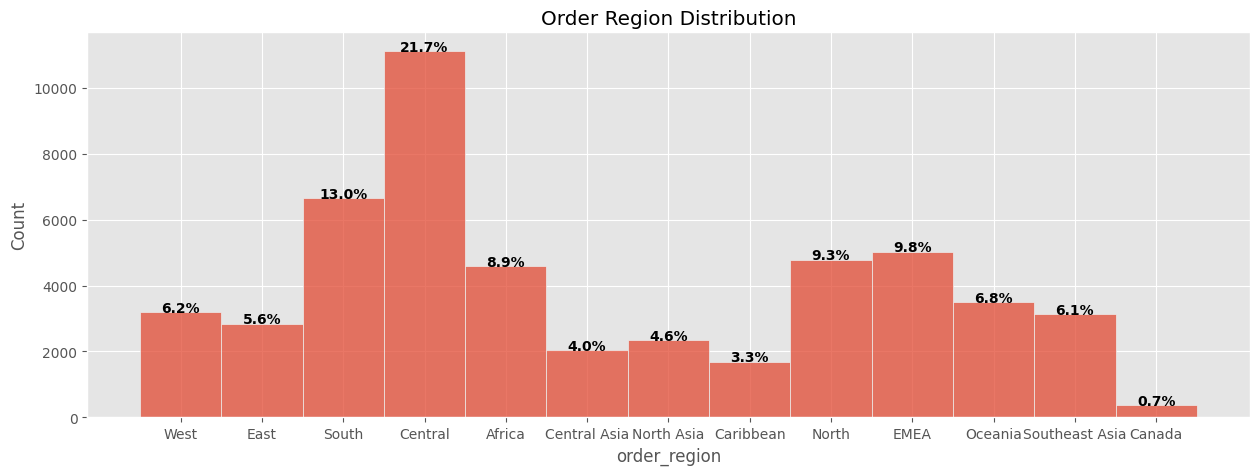

In [11]:
plt.figure(figsize=(15,5))
ax = sns.histplot(data['order_region'], stat='count')
plt.title('Order Region Distribution', loc='center')

# 각 바의 상단 중앙에 비율 표시
total = len(data['order_region'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

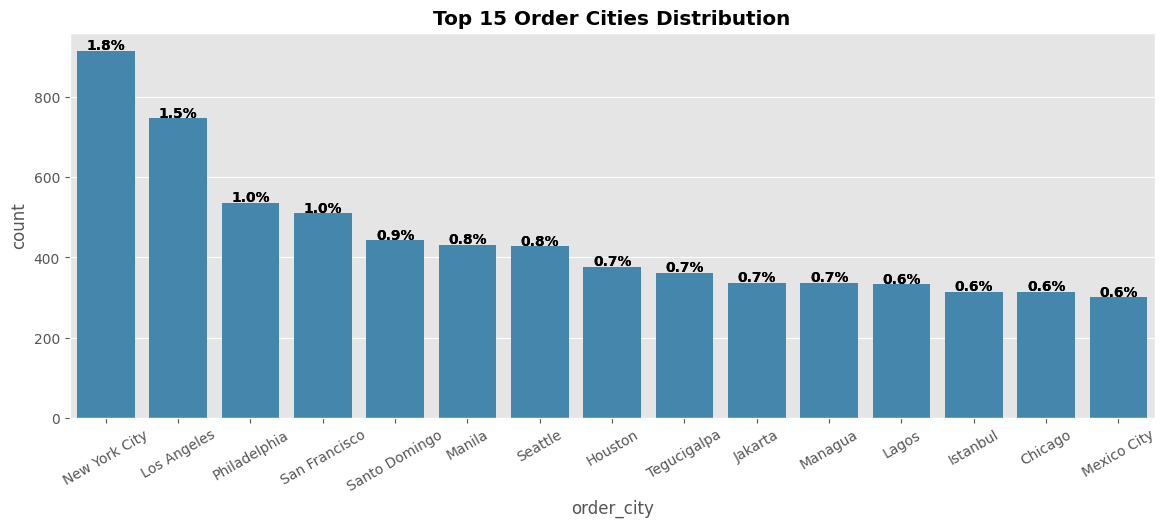

In [12]:
plt.figure(figsize=(14,5))
sns.barplot(data['order_city'].value_counts(ascending=False)[:15])
# 각 바의 상단 중앙에 비율 표시
total_orders = len(data)
ax = sns.barplot(data['order_city'].value_counts(ascending=False)[:15])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total_orders:.1%}', ha="center", weight='bold')
plt.title('Top 15 Order Cities Distribution', loc='center',weight='bold')
plt.xticks(rotation=30)
plt.show()

#### 2-2. 시간적 특성

Text(0.5, 1.0, 'Profit by Timestamps')

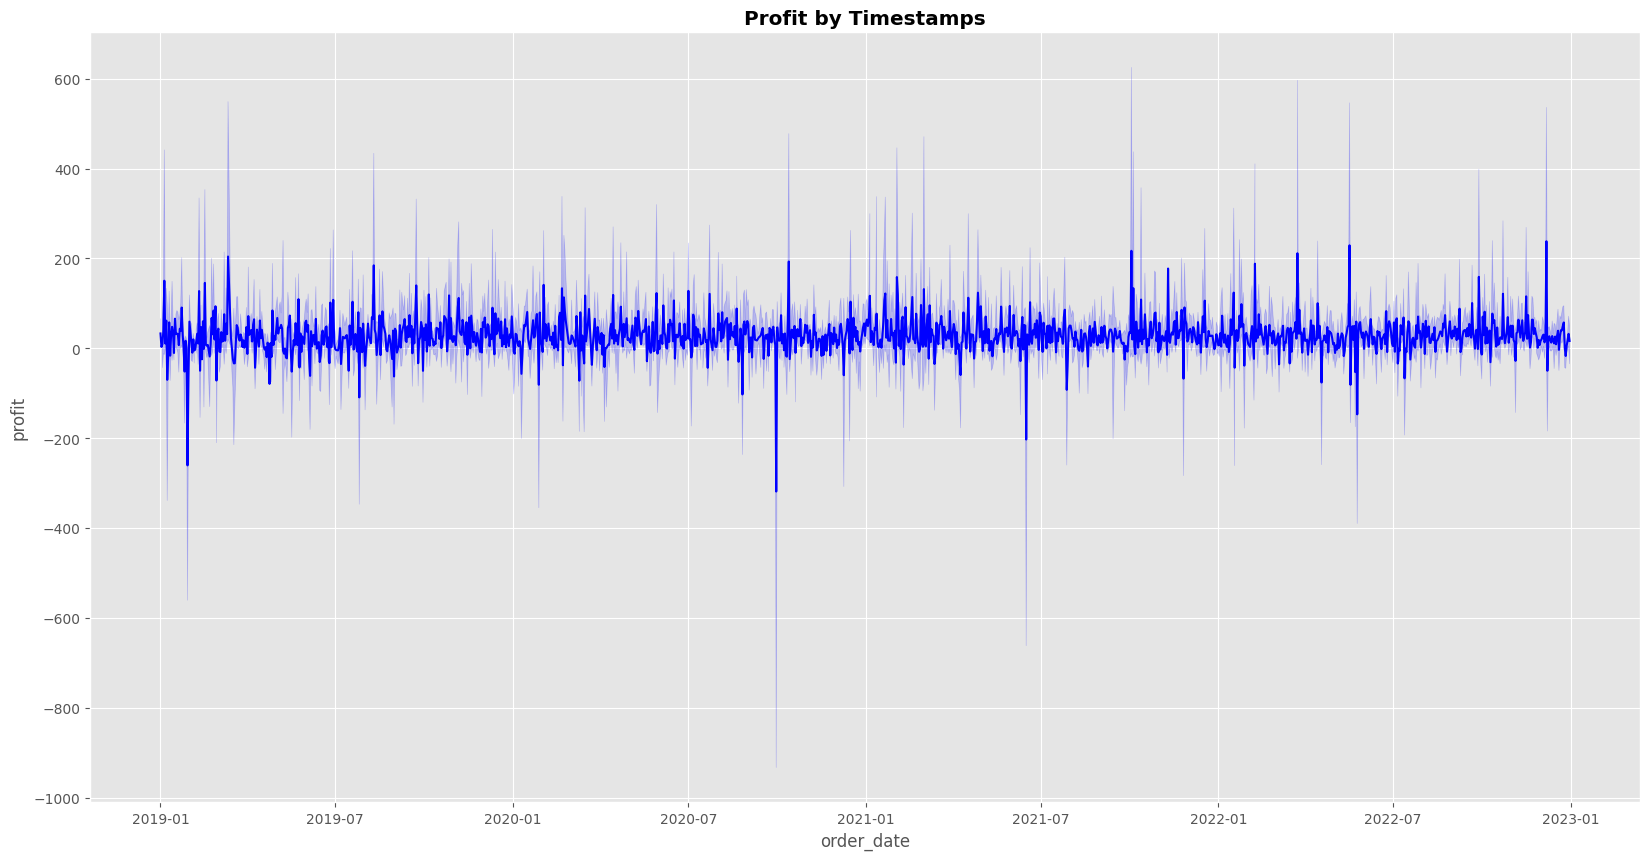

In [13]:
plt.figure(figsize=(20,10))
data['order_date'] = pd.to_datetime(data['order_date'])
sns.lineplot(x=data['order_date'], y=data['profit'], linestyle='-', color='b')

# 최댓값, 최솟값 y축에 선 그리기
plt.title('Profit by Timestamps', weight='bold', loc='center')

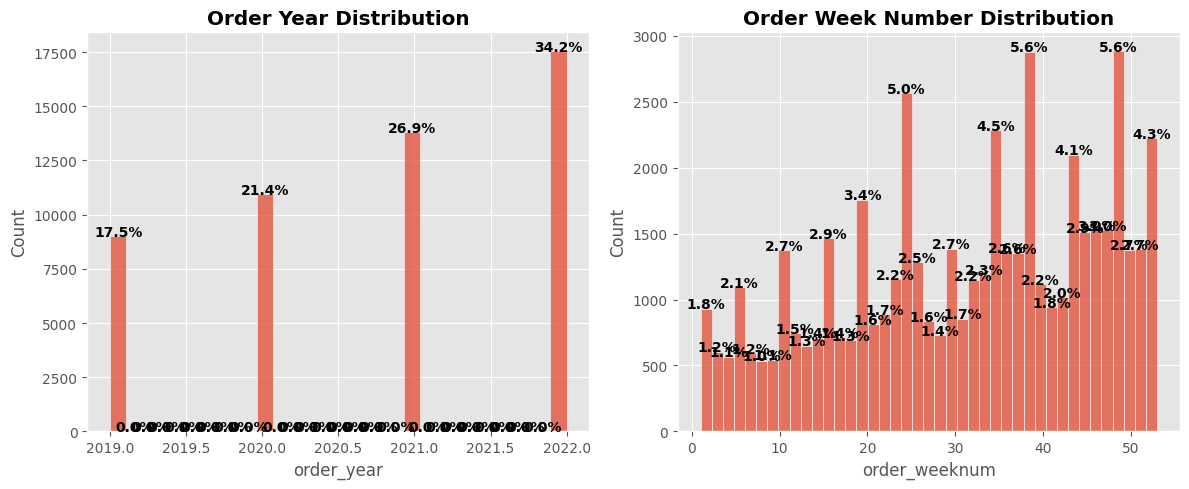

In [14]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

# Plot for 'order_year'
ax = sns.histplot(data['order_year'], stat='count', ax=axes[0])
axes[0].set_title('Order Year Distribution', loc='center', weight='bold')

# 각 바의 상단 중앙에 비율 표시
total = len(data['order_year'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

# Plot for 'order_weeknum'
ax = sns.histplot(data['order_weeknum'], stat='count', ax=axes[1])
axes[1].set_title('Order Week Number Distribution', loc='center', weight='bold')

# 각 바의 상단 중앙에 비율 표시
total = len(data['order_weeknum'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

plt.tight_layout()

#### 2-3. Sales

Text(0.5, 1.0, 'Pre_Sales Distribution')

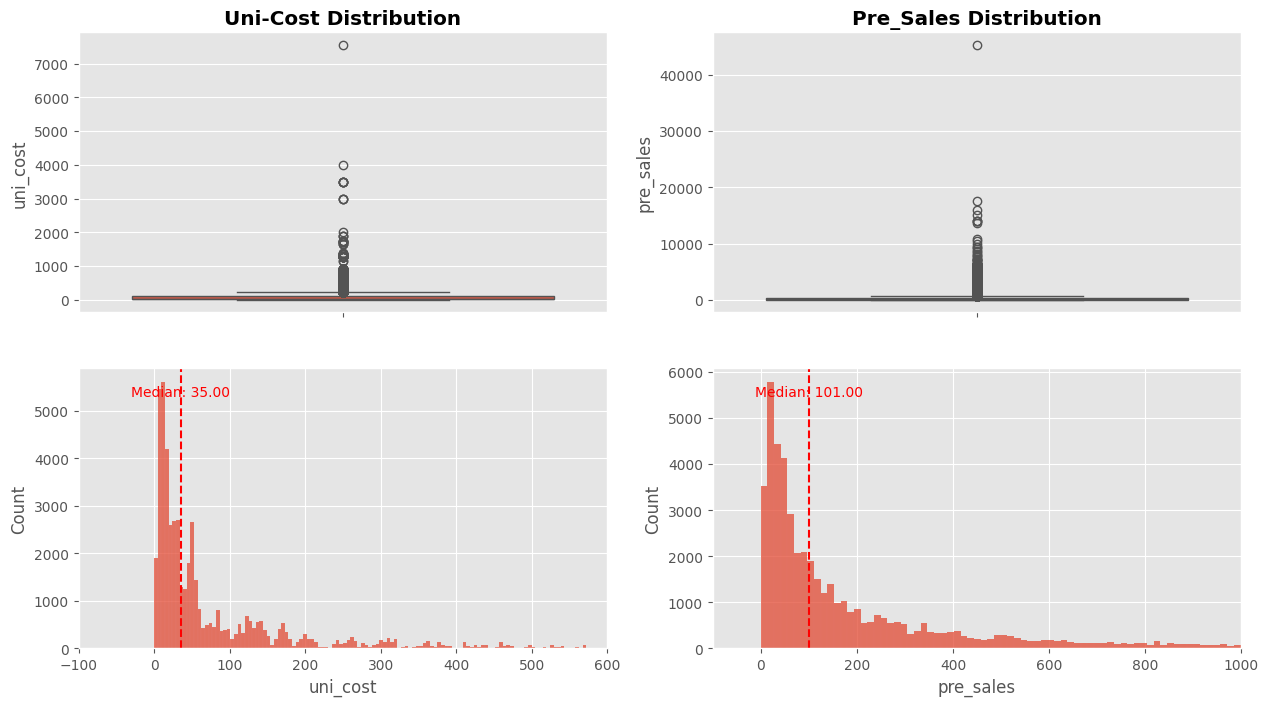

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()
# Plot for 'uni_cost'
sns.boxplot(data['uni_cost'], ax=axes[0])
axes[0].set_title('Uni-Cost Distribution', weight='bold', loc='center')
# Plot for 'uni_cost' with median line
sns.histplot(data['uni_cost'], ax=axes[2])
median_uni_cost = data['uni_cost'].median()
axes[2].axvline(median_uni_cost, color='r', linestyle='--')
axes[2].text(median_uni_cost, axes[2].get_ylim()[1] * 0.9, f'Median: {median_uni_cost:.2f}', color='r', ha='center')
axes[2].set_xlim(-100,600)

# Plot for 'pre_sales' with median line
sns.histplot(data['pre_sales'], ax=axes[3])
median_pre_sales = data['pre_sales'].median()
axes[3].axvline(median_pre_sales, color='r', linestyle='--')
axes[3].text(median_pre_sales, axes[3].get_ylim()[1] * 0.9, f'Median: {median_pre_sales:.2f}', color='r', ha='center')
axes[3].set_xlim(-100,1000)

sns.boxplot(data['pre_sales'],ax=axes[1])
axes[1].set_title('Pre_Sales Distribution',weight='bold',loc='center')

Text(85.0, 5186.16, 'Median: 35.00')

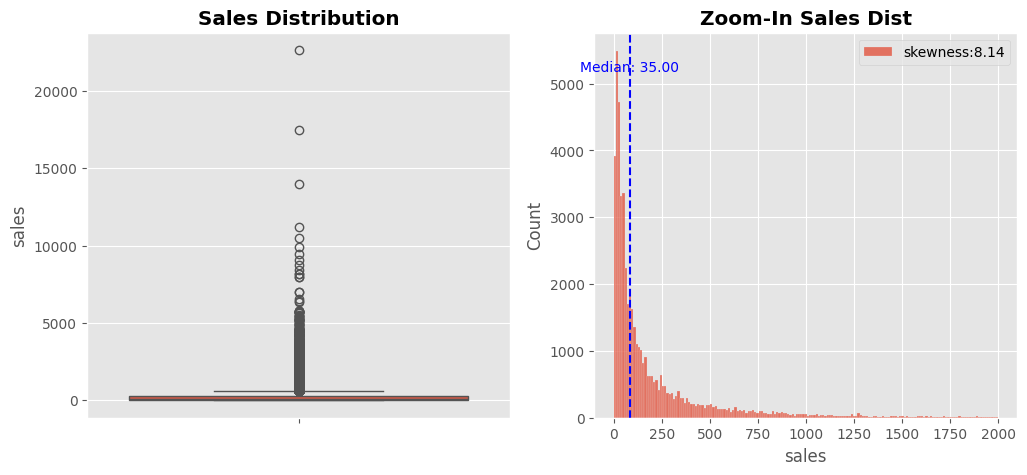

In [16]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax = ax.flatten()

sns.boxplot(data['sales'], ax=ax[0])
ax[0].set_title('Sales Distribution', weight = 'bold', loc = 'center')

sns.histplot(data['sales'].loc[data['sales']<2000], ax=ax[1], label=f"skewness:{data['sales'].skew():.2f}")
ax[1].legend()
ax[1].set_title('Zoom-In Sales Dist',weight='bold')
ax[1].axvline(data['sales'].median(),color='b',linestyle='--')
ax[1].text(data['sales'].median(), ax[1].get_ylim()[1] * 0.9, f'Median: {median_uni_cost:.2f}', color='b', ha='center')

Text(0.5, 1.0, 'Quantity Distribution')

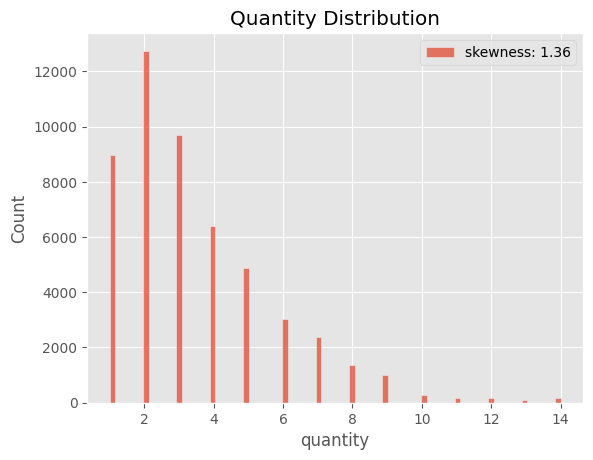

In [17]:
sns.histplot(data['quantity'],label=f"skewness: {data['quantity'].skew():.2f}")
plt.legend()
plt.title('Quantity Distribution')

Text(0.5, 1.0, 'Zoom-In Sales Dist')

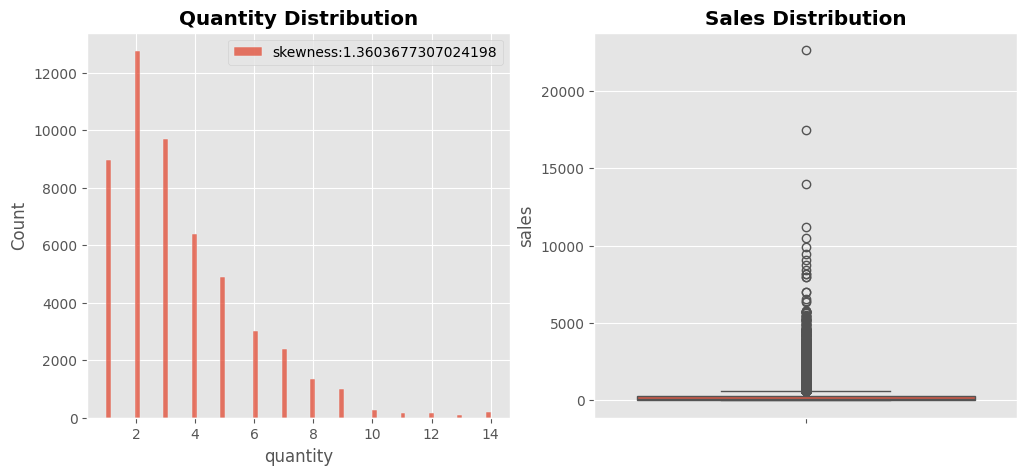

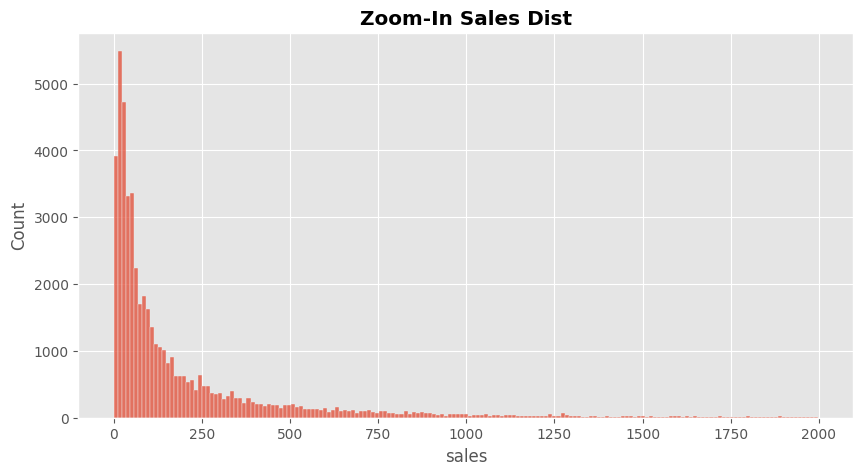

In [18]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax = ax.flatten()

sns.histplot(data['quantity'], ax=ax[0], label=f"skewness:{data['quantity'].skew()}")
ax[0].set_title('Quantity Distribution',weight='bold',loc='center')
ax[0].legend()
sns.boxplot(data['sales'], ax=ax[1])
ax[1].set_title('Sales Distribution', weight = 'bold', loc = 'center')

plt.figure(figsize=(10,5))
sns.histplot(data['sales'].loc[data['sales']<2000])
plt.title('Zoom-In Sales Dist',weight='bold')

Text(0.5, 1.0, 'Discount Distribution')

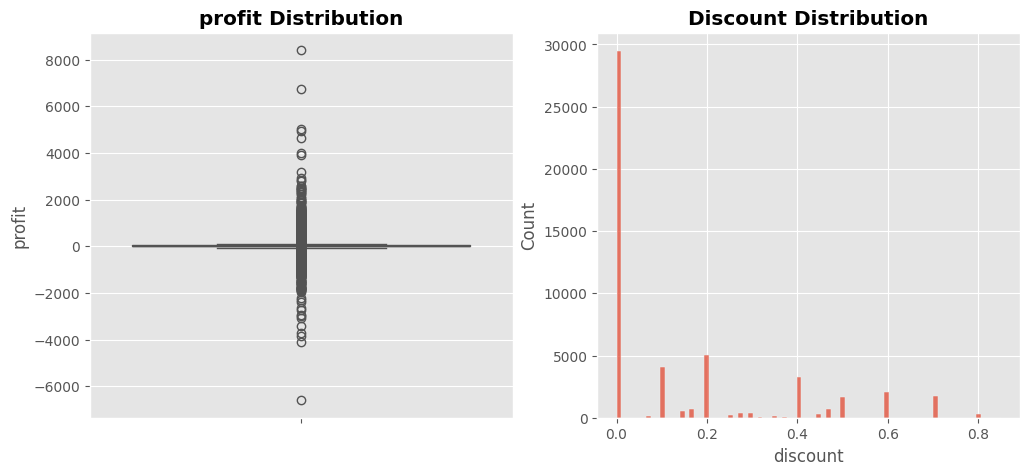

In [19]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax = ax.flatten()

sns.boxplot(data['profit'],ax=ax[0])
sns.histplot(data['discount'],ax=ax[1])
ax[0].set_title('profit Distribution',weight='bold')
ax[1].set_title('Discount Distribution',weight='bold')

### 3.Product

In [20]:
print('Unique product ID:',data['product_id'].nunique())
print('Unique product names:',data['product_name'].nunique())

Unique product ID: 10292
Unique product names: 3788


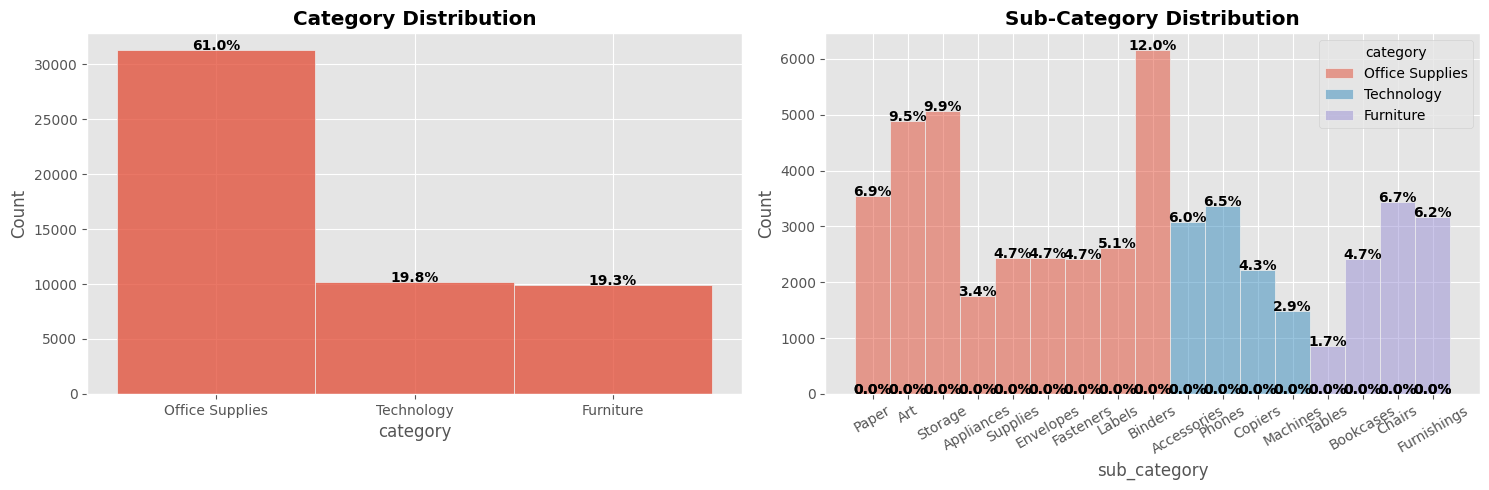

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for 'category'
sns.histplot(data['category'], ax=axes[0])
axes[0].set_title('Category Distribution', weight='bold', loc='center')

total = len(data['category'])
for p in axes[0].patches:
    height = p.get_height()
    axes[0].text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

sns.histplot(x=data['sub_category'], ax=axes[1],hue=data['category'])
axes[1].set_title('Sub-Category Distribution', weight='bold', loc='center')
axes[1].tick_params(axis='x',rotation=30)

total = len(data['sub_category'])
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

plt.tight_layout()

### 4. Supermarket

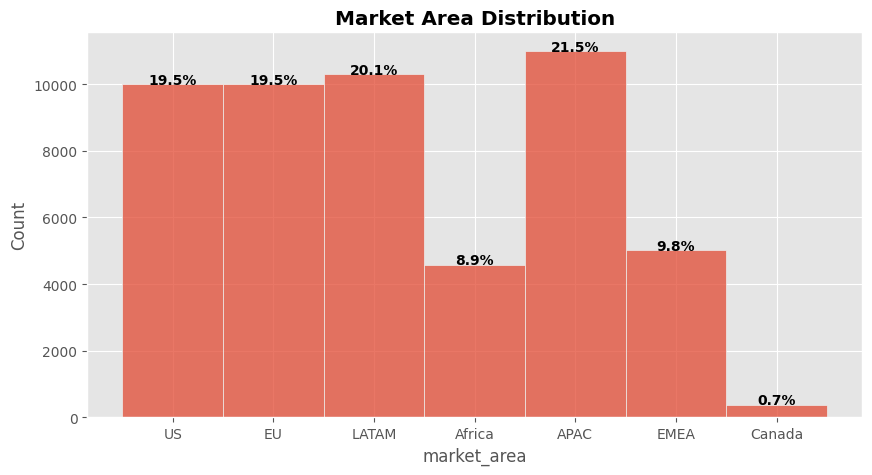

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data['market_area'])
plt.title('Market Area Distribution', weight='bold', loc='center')
# 각 바의 상단 중앙에 비율 표시
total = len(data['market_area'])
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

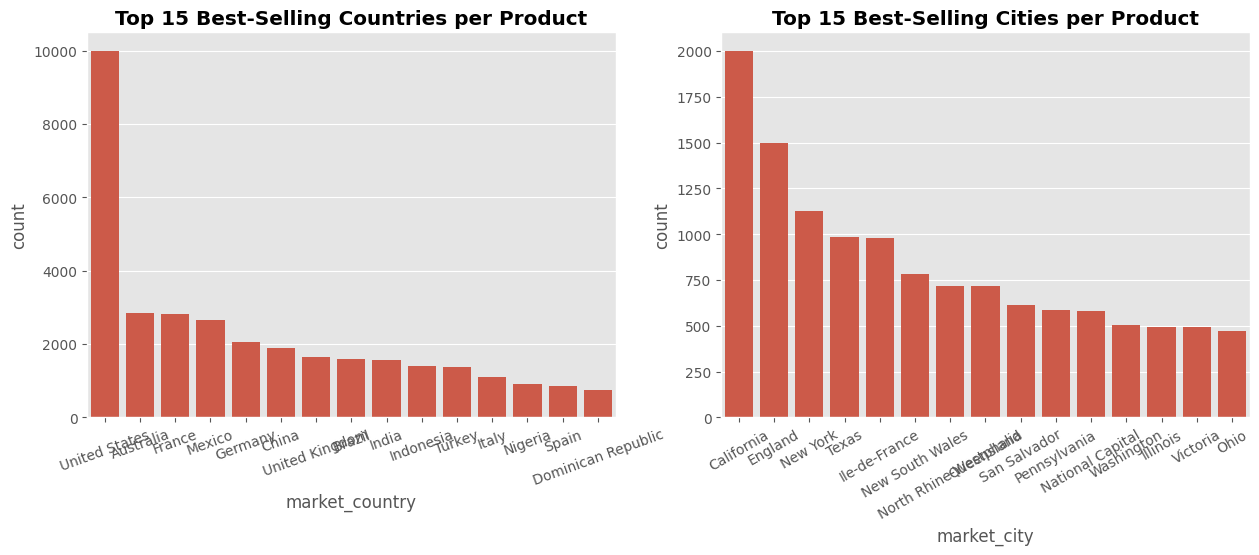

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()
# Plot for 'market_country'
sns.barplot(data['market_country'].value_counts()[:15], ax=axes[0])
axes[0].set_title('Top 15 Best-Selling Countries per Product', weight='bold', loc='center')
axes[0].tick_params(axis='x',rotation=20)
# Plot for 'market_city'
sns.barplot(data['market_city'].value_counts()[:15], ax=axes[1])
axes[1].set_title('Top 15 Best-Selling Cities per Product', weight='bold', loc='center')
axes[1].tick_params(axis='x',rotation=30)

### 5. Shipping
- 운송 과정에서 걸린 시간을 추가 feature로 넣으면 좋을듯

<Axes: xlabel='ship_date', ylabel='profit'>

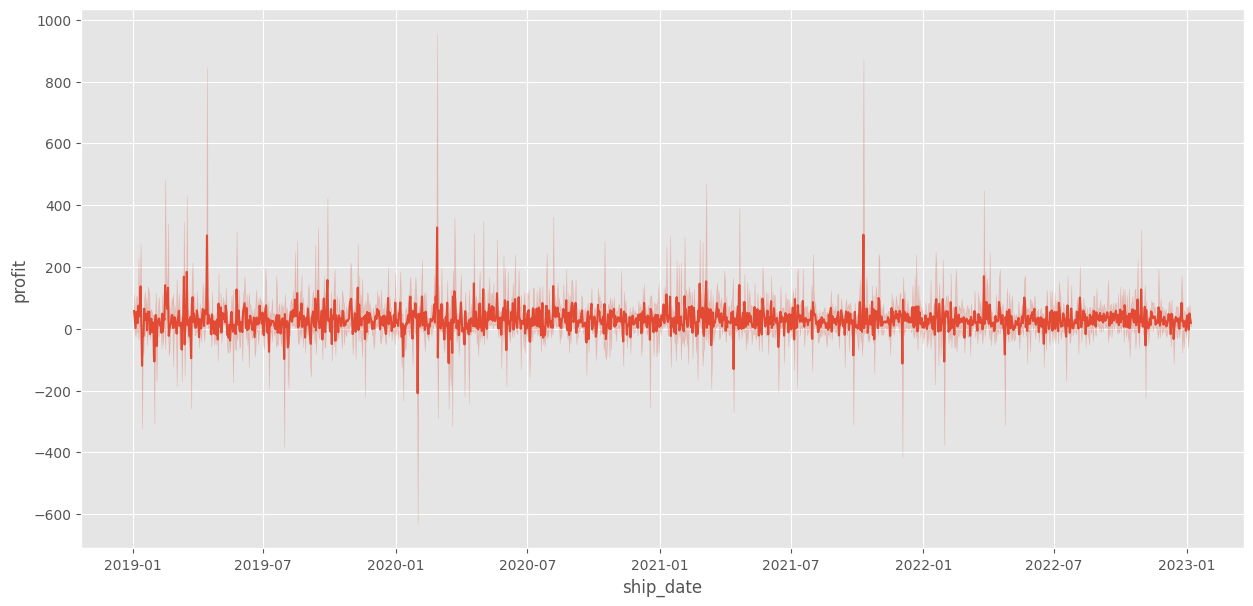

In [24]:
plt.figure(figsize=(15,7))
data['ship_date'] = pd.to_datetime(data['ship_date'])
sns.lineplot(data=data,x='ship_date',y='profit')

Text(0.5, 1.0, 'Shipping Cost Distribution')

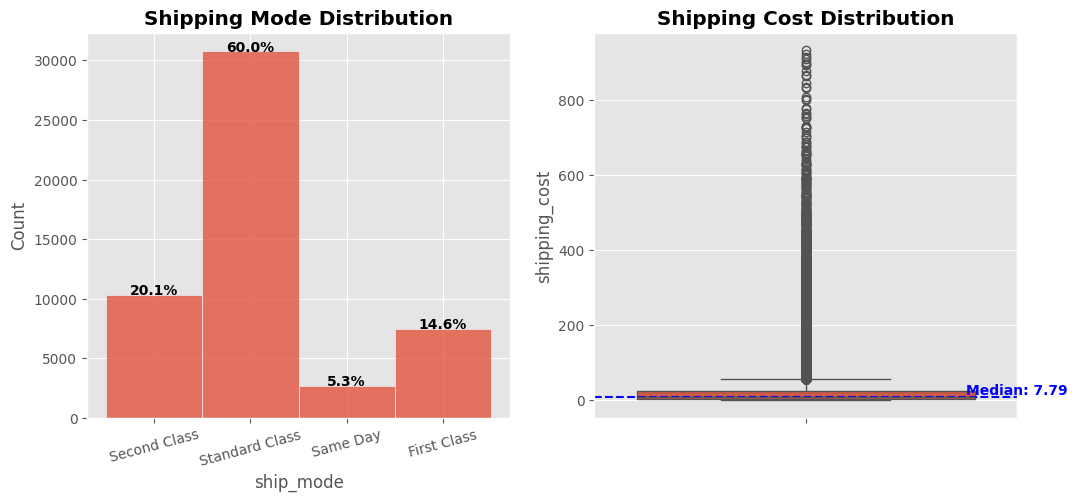

In [25]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(data['ship_mode'],ax=ax[0])
ax[0].set_title('Shipping Mode Distribution',weight='bold')
ax[0].tick_params(axis='x',rotation=15)
total = len(data['ship_mode'])
for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

sns.boxplot(data['shipping_cost'],ax=ax[1])
med_val = data['shipping_cost'].median()
ax[1].axhline(med_val, color='b', linestyle='--')
ax[1].text(0.5, med_val, f'Median: {med_val:.2f}', color='b', ha='center', va='bottom', weight='bold')
ax[1].set_title('Shipping Cost Distribution', weight='bold')

### Correlation Analysis

In [26]:
data.columns

Index(['customer_id', 'customer_name', 'customer_segment', 'order_id',
       'order_city', 'order_region', 'order_date', 'order_year',
       'order_weeknum', 'quantity', 'sales', 'product_id', 'product_name',
       'profit', 'discount', 'category', 'sub_category', 'market_country',
       'market_area', 'market_city', 'ship_date', 'ship_mode', 'shipping_cost',
       'row_id', 'pre_sales', 'uni_cost'],
      dtype='object')

In [27]:
ind_col = ['customer_id','customer_name','order_id',]
cat_col = ['customer_id','customer_name','customer_segment','order_id','order_city','order_region',
           'order_date','order_year','order_weeknum','product_id','product_name','market_area','market_city',
           'ship_date','ship_mode','category','sub_category','market_country']
con_col = ['quantity','sales','shipping_cost','profit','discount','row_id','uni_cost','pre_sales']

In [28]:
data_c = data.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_c[cat_col] = data_c[cat_col].apply(lambda x:le.fit_transform(x))

Text(0.5, 1.0, 'All Feature Correlation Analysis')

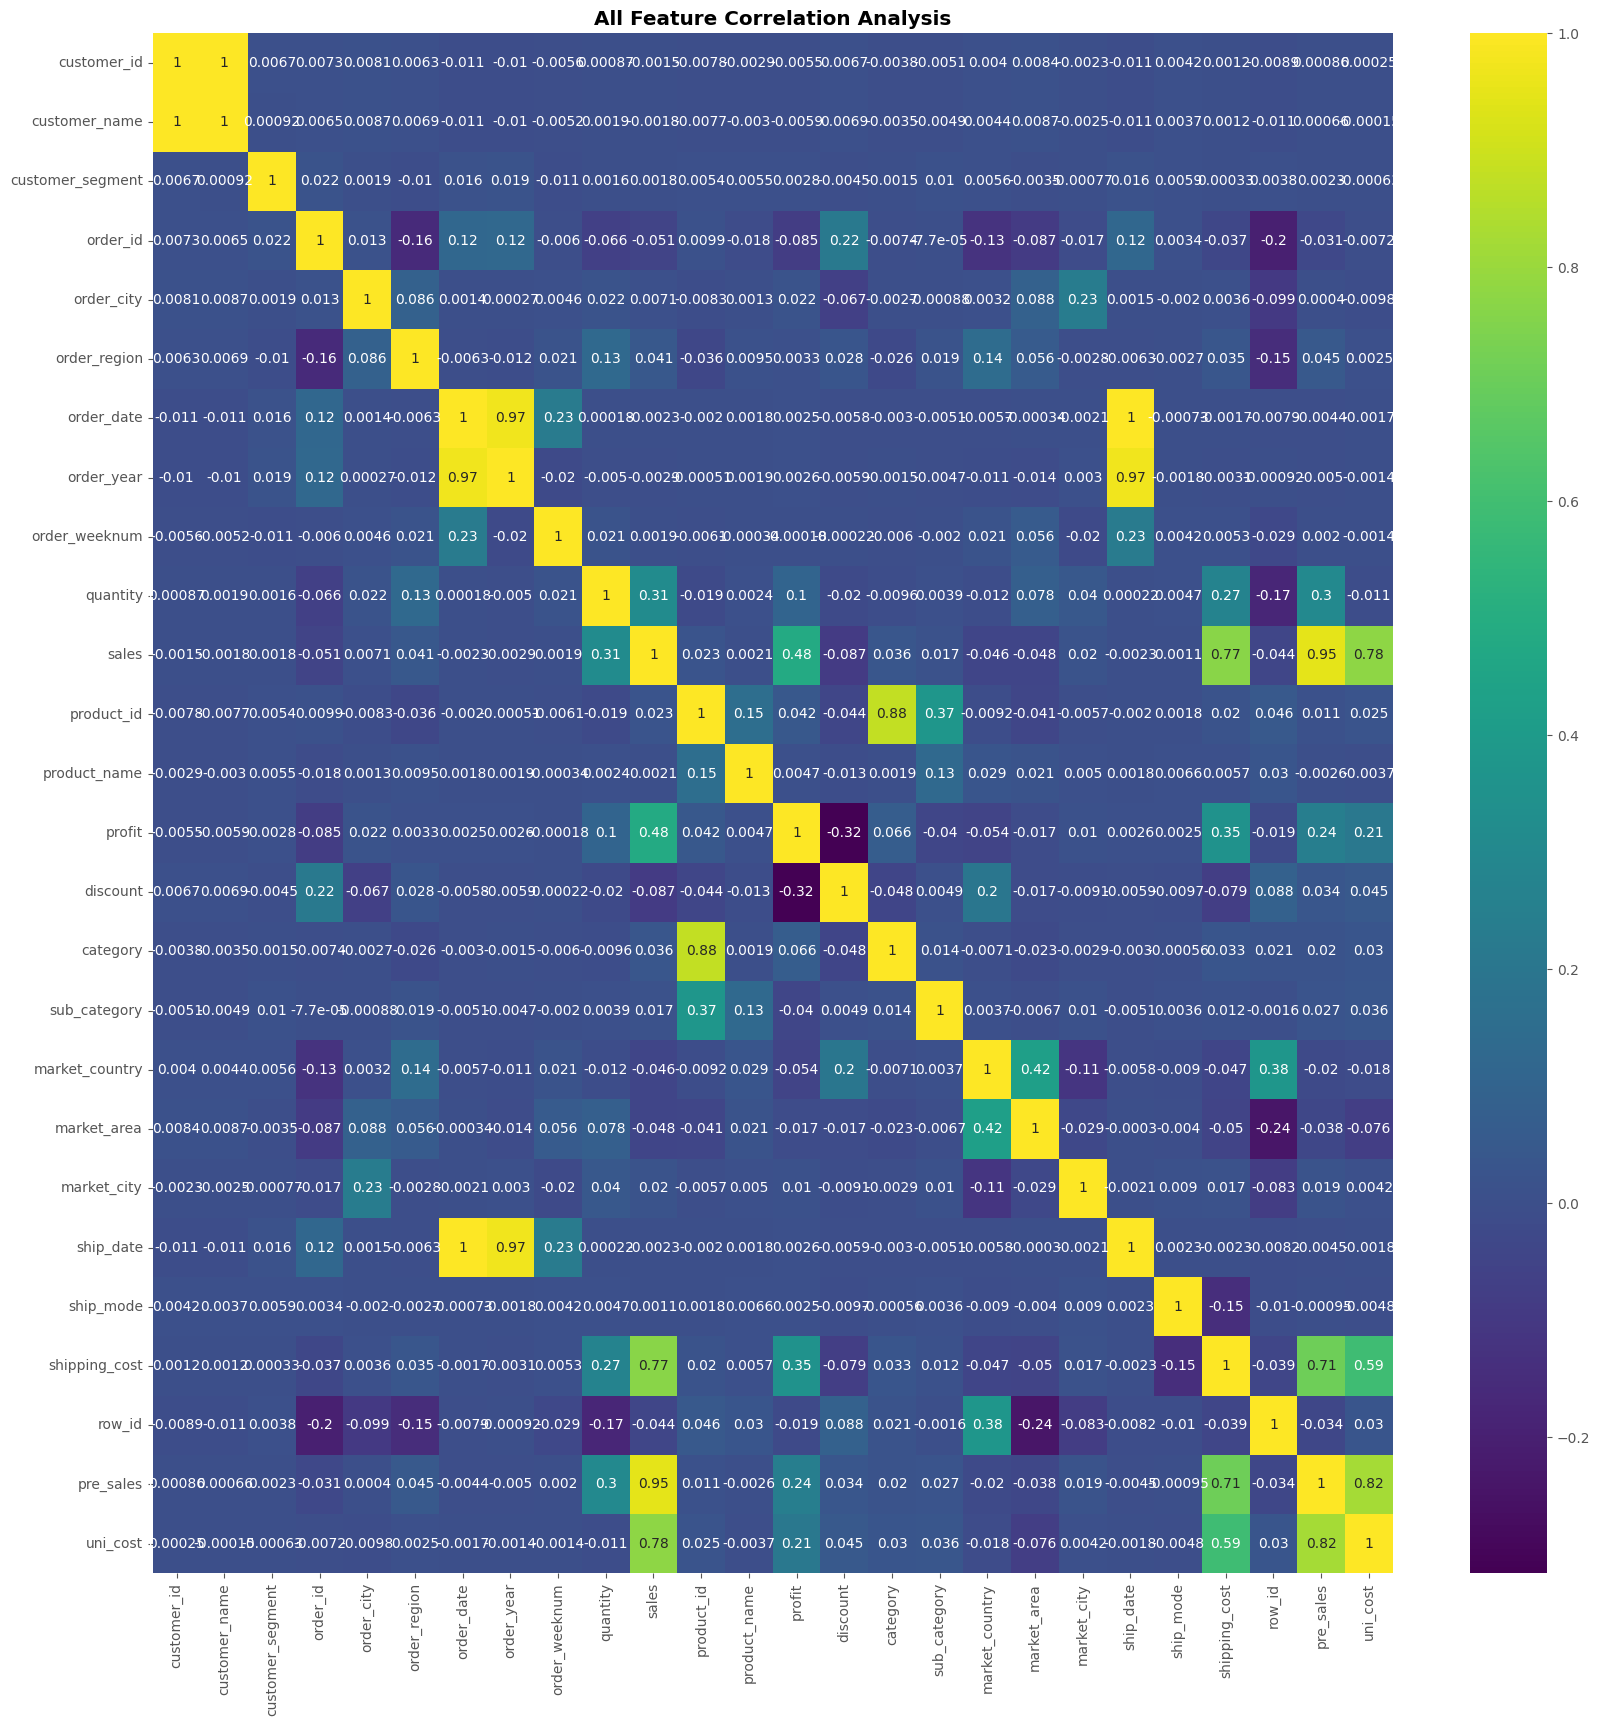

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(data_c.corr(numeric_only=True),annot=True,cmap='viridis')
plt.title('All Feature Correlation Analysis',weight='bold')

Text(0.5, 1.0, 'Correlation btw Numeric Values')

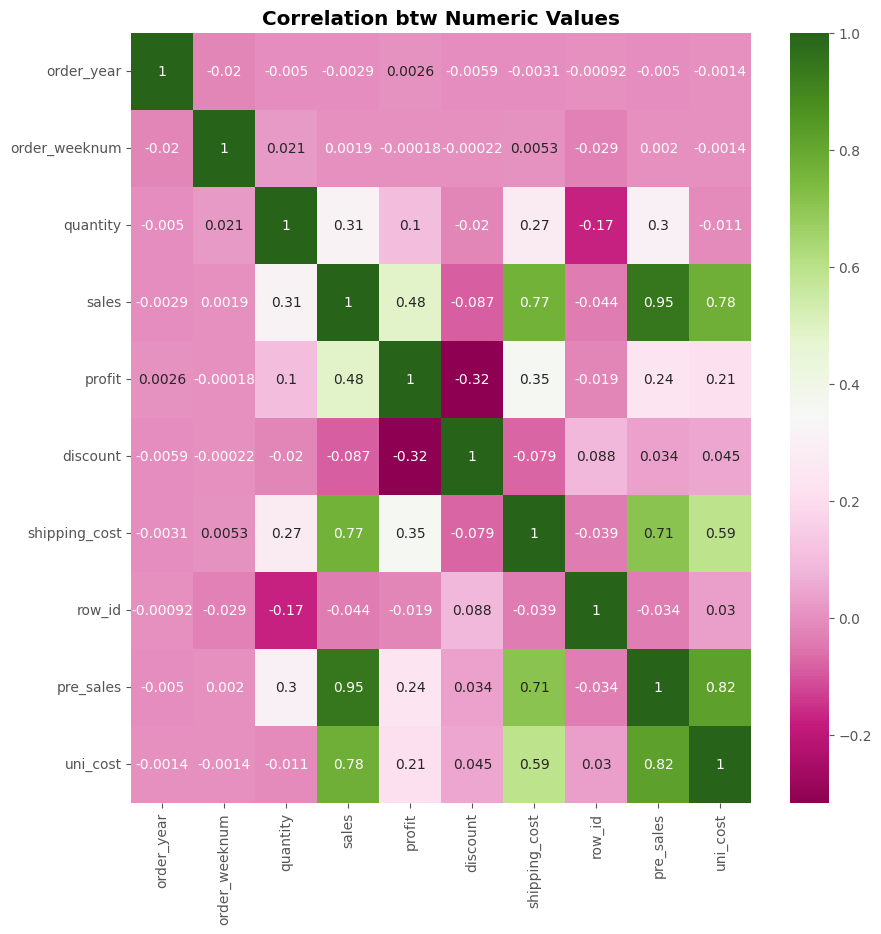

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap='PiYG')
plt.title('Correlation btw Numeric Values',weight='bold')

In [31]:
eta = (data['ship_date'] - data['order_date'])
eta.value_counts()

4 days    14434
5 days    11221
2 days     7026
6 days     6255
3 days     5035
7 days     3057
0 days     2600
1 days     1662
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution ETA')

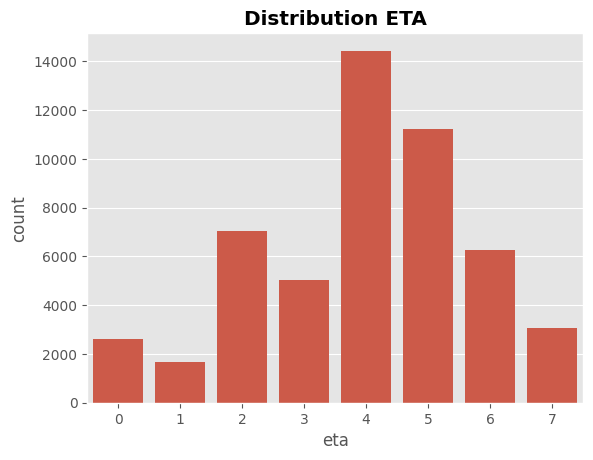

In [32]:
data['eta'] = (data['ship_date'] - data['order_date']).dt.days
sns.barplot(data['eta'].value_counts().sort_values(ascending=False))
plt.title('Distribution ETA',weight='bold')

### Loss Analysis

In [33]:
minus = data.loc[data['profit']<0]
print(minus.shape)
plt.style.use('bmh')

(12544, 27)


In [34]:
#최고 손실액 거래
minus.loc[minus['profit']==minus['profit'].min()][con_col]

quantity  sales  shipping_cost    profit  discount  row_id  uni_cost  \
47074         5   4500         451.63 -6599.978       0.7   39069    3000.0   

       pre_sales  
47074    15000.0

Text(0.5, 1.0, 'Feature Correlation of Loss Data')

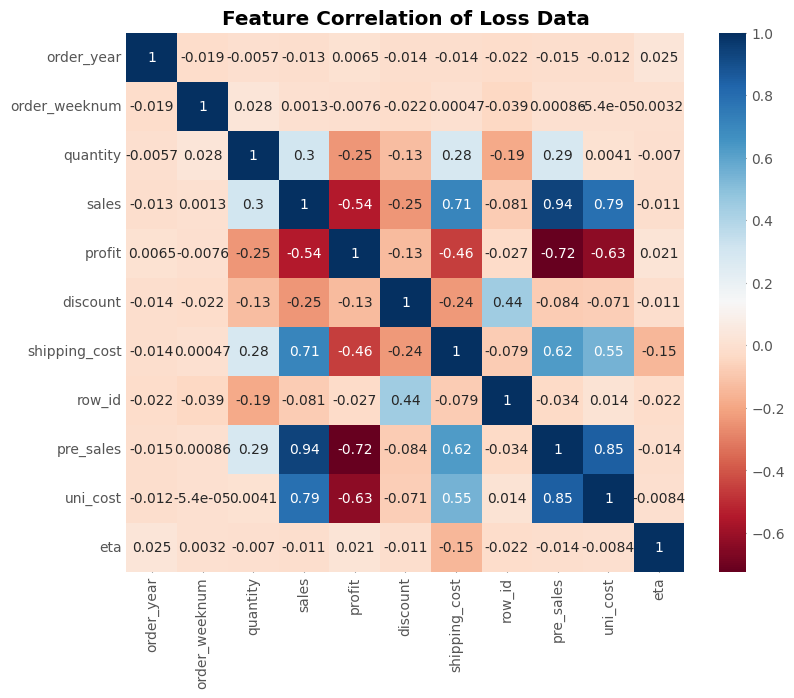

In [35]:
plt.figure(figsize=(9,7))
sns.heatmap(minus.corr(numeric_only=True),annot=True,cmap='RdBu')
plt.title('Feature Correlation of Loss Data',weight='bold')

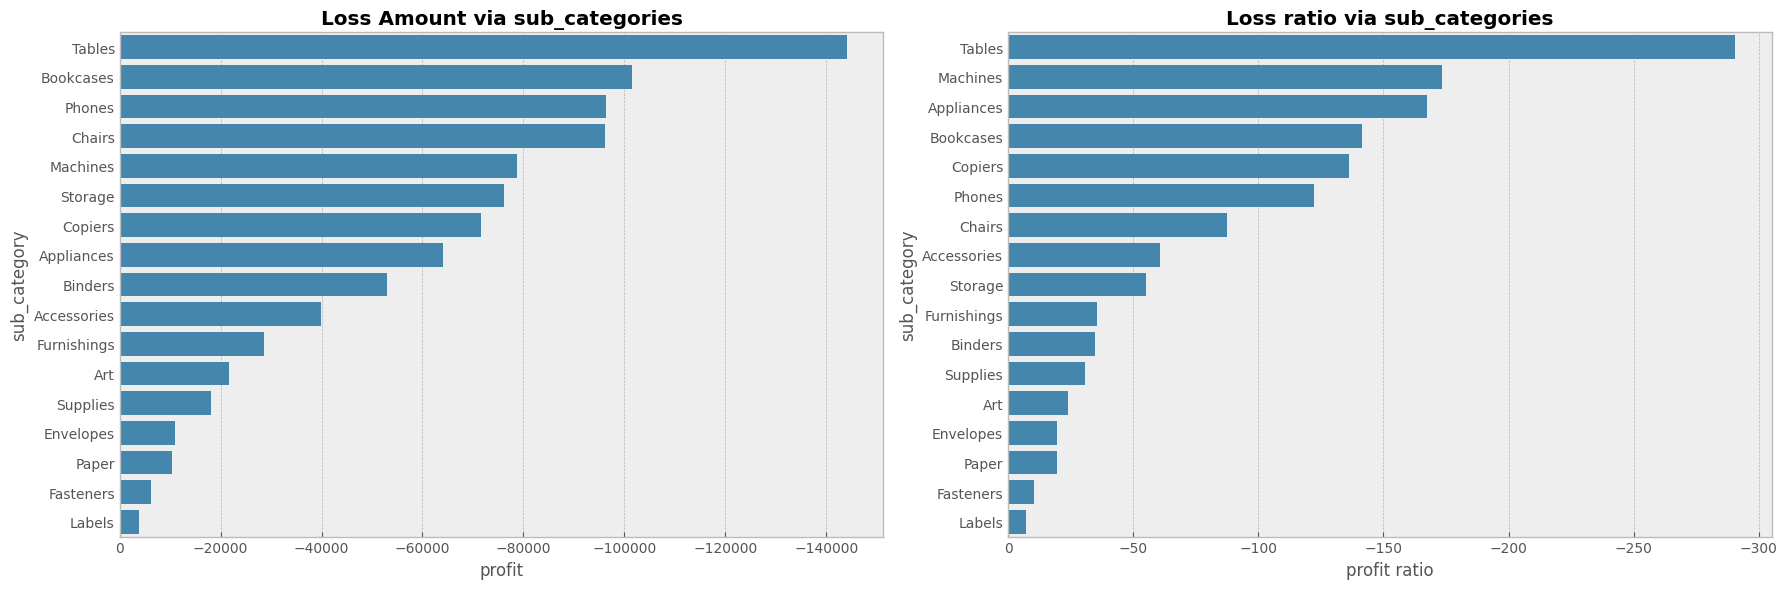

In [36]:
dam_ratio = minus.groupby('sub_category')['profit'].sum() / minus['sub_category'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프
sns.barplot(minus.groupby('sub_category')['profit'].sum().sort_values(ascending=True), orient='h', ax=axes[0])
axes[0].invert_xaxis()
axes[0].set_title('Loss Amount via sub_categories', weight='bold')

# 두 번째 그래프
sns.barplot(dam_ratio.sort_values(), orient='h', ax=axes[1])
axes[1].invert_xaxis()
axes[1].set_title('Loss ratio via sub_categories', weight='bold')
axes[1].set_xlabel('profit ratio')
plt.tight_layout()

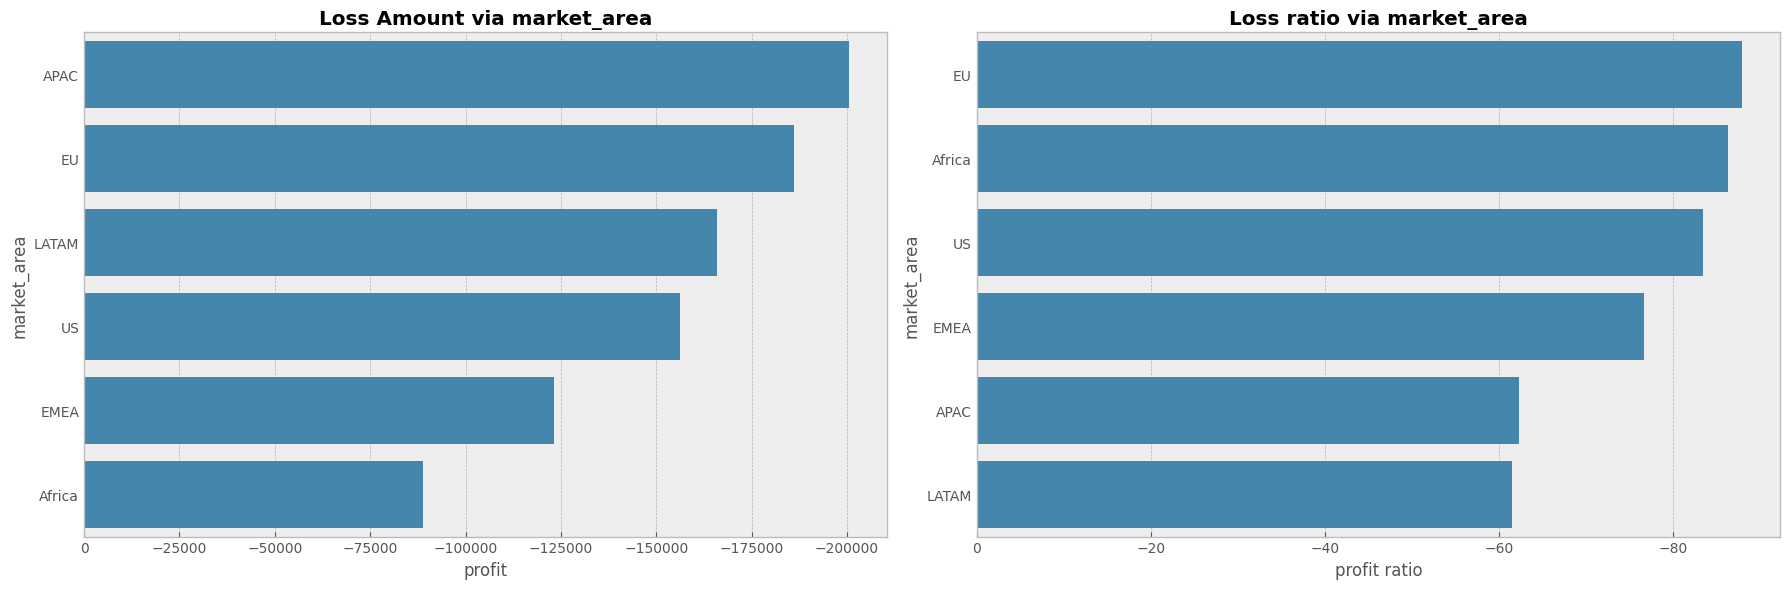

In [37]:
dam_ratio = minus.groupby('market_area')['profit'].sum() / minus['market_area'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프
sns.barplot(minus.groupby('market_area')['profit'].sum().sort_values(ascending=True), orient='h', ax=axes[0])
axes[0].invert_xaxis()
axes[0].set_title('Loss Amount via market_area', weight='bold')

# 두 번째 그래프
sns.barplot(dam_ratio.sort_values(), orient='h', ax=axes[1])
axes[1].invert_xaxis()
axes[1].set_title('Loss ratio via market_area', weight='bold')
axes[1].set_xlabel('profit ratio')
plt.tight_layout()


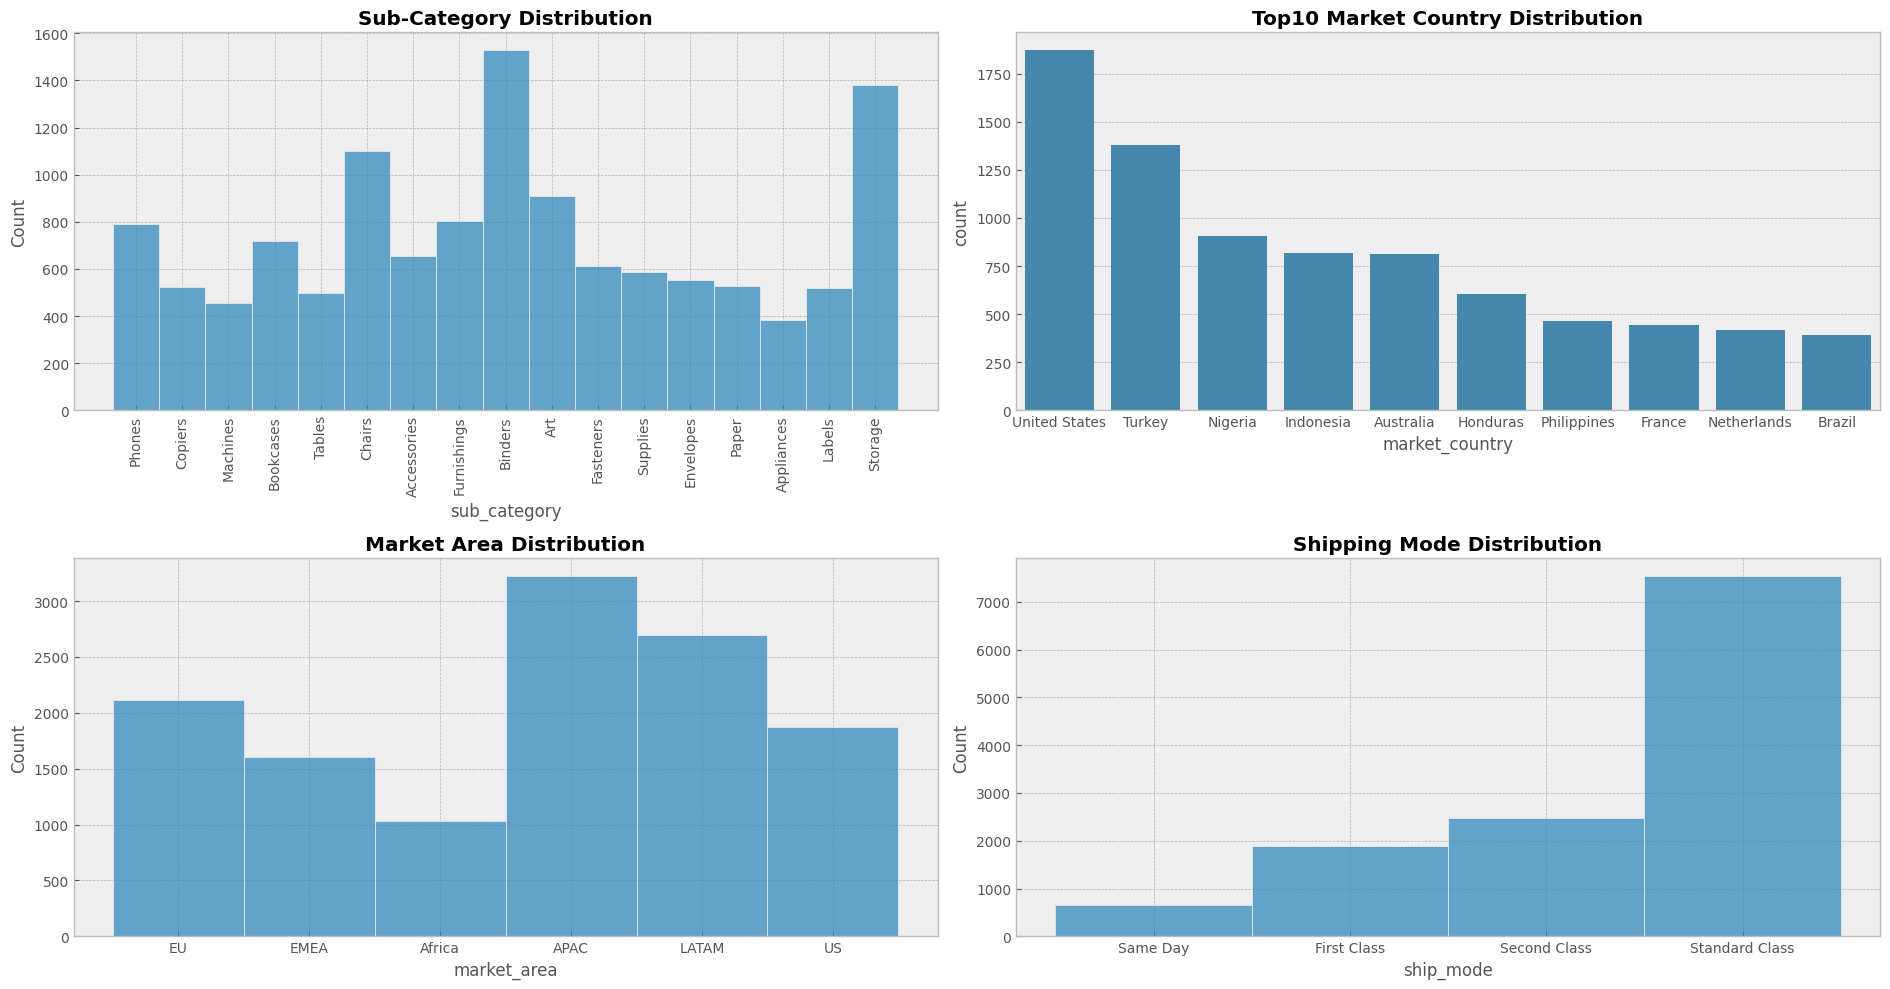

In [38]:

fig, axes = plt.subplots(2, 2, figsize=(19, 10))
axes=axes.flatten()

# Plot for 'sub_category'
sns.histplot(minus['sub_category'], ax=axes[0])
axes[0].set_title('Sub-Category Distribution', weight='bold', loc='center')
axes[0].tick_params(axis='x',rotation=90)

# Plot for 'market_country'
sns.barplot(minus['market_country'].value_counts()[:10], ax=axes[1])
axes[1].set_title('Top10 Market Country Distribution', weight='bold', loc='center')

# Plot for 'market_area'
sns.histplot(minus['market_area'], ax=axes[2])
axes[2].set_title('Market Area Distribution', weight='bold', loc='center')
 
# Plot for 'ship_mode'
sns.histplot(minus['ship_mode'], ax=axes[3])
axes[3].set_title('Shipping Mode Distribution', weight='bold', loc='center')

plt.tight_layout()

In [39]:
duplicate_customers = minus[minus.duplicated(subset=['customer_id'], keep=False)]
duplicate_customers

customer_id      customer_name customer_segment         order_id  \
29018   DH-130752      Dave Hallsten        Corporate  ES-2019-4614329   
29021   MH-174552      Mark Hamilton         Consumer  ES-2020-2141914   
29026   KM-163752   Katherine Murray      Home Office  ES-2020-3349892   
29028   SJ-205002    Shirley Jackson         Consumer  IT-2020-2308326   
29029   PM-189402     Paul MacIntyre         Consumer  IT-2020-1779015   
...           ...                ...              ...              ...   
51156   LH-171554   Logan Haushalter         Consumer   US-2021-139486   
51163   SC-202304         Scot Coram        Corporate   US-2021-126452   
51164   SC-202304         Scot Coram        Corporate   US-2021-126452   
51180   MG-176804  Maureen Gastineau      Home Office   US-2022-109316   
51186   MG-181454    Mike Gockenbach         Consumer   CA-2022-108574   

                 order_city order_region order_date  order_year  \
29018    Tremblay-en-France      Central 2019-12-02        2019   
29021            Guyancourt      Central 2020-06-07        2020   
29026                 Paris      Central 2020-09-01        2020   
29028     Neuilly-Plaisance      Central 2020-09-28        2020   
29029  Boulogne-Billancourt      Central 2020-09-29        2020   
...                     ...          ...        ...         ...   
51156           Los Angeles         West 2021-05-22        2021   
51163           Los Angeles         West 2021-08-22        2021   
51164           Los Angeles         West 2021-08-22        2021   
51180           Los Angeles         West 2022-06-09        2022   
51186           Los Angeles         West 2022-10-08        2022   

       order_weeknum  quantity  ...  market_country market_area  \
29018             49         3  ...          France          EU   
29021             23         2  ...          France          EU   
29026             35         2  ...          France          EU   
29028             39         7  ...          France          EU   
29029             39         9  ...          France          EU   
...              ...       ...  ...             ...         ...   
51156             21         3  ...   United States          US   
51163             34         2  ...   United States          US   
51164             34         5  ...   United States          US   
51180             24         2  ...   United States          US   
51186             41         7  ...   United States          US   

         market_city  ship_date       ship_mode shipping_cost row_id  \
29018  Ile-de-France 2019-12-04     First Class          5.53  14661   
29021  Ile-de-France 2020-06-11    Second Class         60.78  13807   
29026  Ile-de-France 2020-09-05    Second Class         25.60  12196   
29028  Ile-de-France 2020-09-28        Same Day         23.02  14679   
29029  Ile-de-France 2020-09-29        Same Day        540.77  15896   
...              ...        ...             ...           ...    ...   
51156     California 2021-05-24     First Class         17.61  31820   
51163     California 2021-08-29  Standard Class          4.74  38164   
51164     California 2021-08-29  Standard Class         14.61  38162   
51180     California 2022-06-11     First Class          0.94  39112   
51186     California 2022-10-12  Standard Class         11.24  33702   

         pre_sales    uni_cost eta  
29018   111.764706   37.254902   2  
29021   336.470588  168.235294   4  
29026   534.117647  267.058824   4  
29028  1336.470588  190.924370   0  
29029  2372.941176  263.660131   0  
...            ...         ...  ..  
51156    68.750000   22.916667   2  
51163    40.000000   20.000000   7  
51164   115.000000   23.000000   7  
51180    22.500000   11.250000   2  
51186   161.250000   23.035714   4  

[11666 rows x 27 columns]

#### 1. Tables

In [40]:
mt = minus.loc[minus['sub_category']=='Tables']
mt['profit'].min()

-2750.28

In [41]:
mt['name_short'] = [i.split(' ')[0] for i in mt['product_name']]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28792\3427492139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt['name_short'] = [i.split(' ')[0] for i in mt['product_name']]


Text(0.5, 1.0, 'Correlation in Loss(Table) Data')

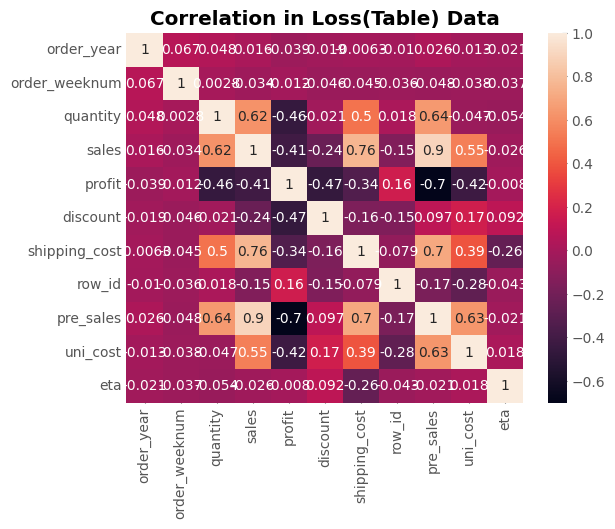

In [42]:
sns.heatmap(mt.corr(numeric_only=True),annot=True)
plt.title('Correlation in Loss(Table) Data',weight='bold')

In [43]:
dt = data.loc[data['sub_category']=='Tables']
dt['name_short'] = [i.split(' ')[0] for i in dt['product_name']]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28792\36832558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['name_short'] = [i.split(' ')[0] for i in dt['product_name']]


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28792\541365178.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8, fontweight='bold')


[Text(0, 0, 'Bevis'),
 Text(0, 1, 'Barricks'),
 Text(0, 2, 'Lesro'),
 Text(0, 3, 'Chromcraft'),
 Text(0, 4, 'Hon'),
 Text(0, 5, 'Balt'),
 Text(0, 6, 'Riverside'),
 Text(0, 7, 'Bush'),
 Text(0, 8, 'Bretford'),
 Text(0, 9, 'BoxOffice'),
 Text(0, 10, 'BPI'),
 Text(0, 11, 'KI'),
 Text(0, 12, 'Iceberg'),
 Text(0, 13, 'Laminate'),
 Text(0, 14, 'Office'),
 Text(0, 15, 'Anderson'),
 Text(0, 16, 'Safco'),
 Text(0, 17, 'Global'),
 Text(0, 18, 'SAFCO')]

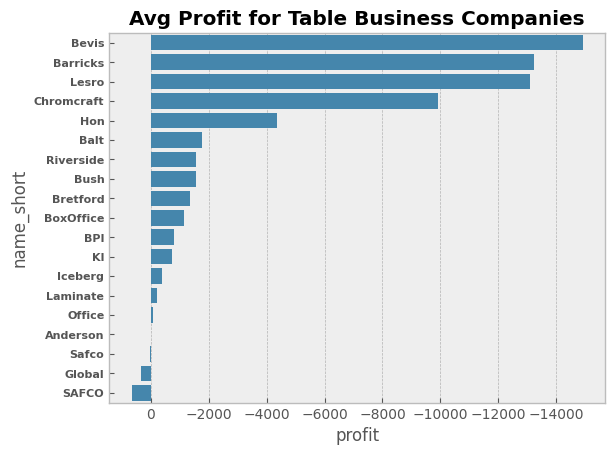

In [44]:
ax = sns.barplot(dt.groupby('name_short')['profit'].sum().sort_values(),orient='h')
ax.invert_xaxis()
plt.title('Avg Profit for Table Business Companies',weight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8, fontweight='bold')

In [45]:
dt.loc[dt['name_short']=='Lesro']['product_name'].unique()

array(['Lesro Computer Table, Adjustable Height',
       'Lesro Training Table, Fully Assembled',
       'Lesro Wood Table, with Bottom Storage',
       'Lesro Coffee Table, Adjustable Height',
       'Lesro Training Table, with Bottom Storage',
       'Lesro Round Table, Rectangular',
       'Lesro Computer Table, with Bottom Storage',
       'Lesro Wood Table, Rectangular',
       'Lesro Computer Table, Fully Assembled',
       'Lesro Conference Table, with Bottom Storage',
       'Lesro Training Table, Adjustable Height',
       'Lesro Conference Table, Fully Assembled',
       'Lesro Coffee Table, Rectangular',
       'Lesro Conference Table, Adjustable Height',
       'Lesro Conference Table, Rectangular',
       'Lesro Round Table, with Bottom Storage',
       'Lesro Coffee Table, with Bottom Storage',
       'Lesro Round Back Collection Coffee Table, End Table',
       'Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table',
       'Lesro Coffee Table, F

In [46]:
mt.loc[mt['profit']<-1500][['order_region','order_city','market_area','product_id','discount','uni_cost','profit','name_short']].sort_values('profit')

order_region order_city market_area        product_id  discount  \
29652          EMEA    Vilnius        EMEA  FUR-BAR-10003532      0.70   
30191  Central Asia     Lahore        APAC   FUR-TA-10002172      0.80   
29974       Central    Hanover          EU   FUR-TA-10003963      0.85   
29704         North  Stockholm          EU   FUR-TA-10003354      0.70   
47284         South    Concord          US   FUR-TA-10000198      0.40   
29390          EMEA     Ankara        EMEA  FUR-BEV-10002193      0.60   
38582         South  Barcelona          EU   FUR-TA-10004054      0.60   
40773        Africa      Zaria      Africa  FUR-CHR-10002278      0.70   
29693         North  Stockholm          EU   FUR-TA-10004371      0.70   

         uni_cost     profit  name_short  
29652  904.583333 -2750.2800    Barricks  
30191  919.285714 -2380.3500         Hon  
29974  925.000000 -1924.5420       Bevis  
29704  909.333333 -1864.0950    Barricks  
47284  551.025641 -1862.3124  Chromcraft  
29390  520.416667 -1779.7680       Bevis  
38582  857.500000 -1629.5400       Lesro  
40773  469.166667 -1576.8240  Chromcraft  
29693  454.285714 -1557.9900       Lesro

Text(-1500, 118.125, 'val-1500 percentile: 1.81%')

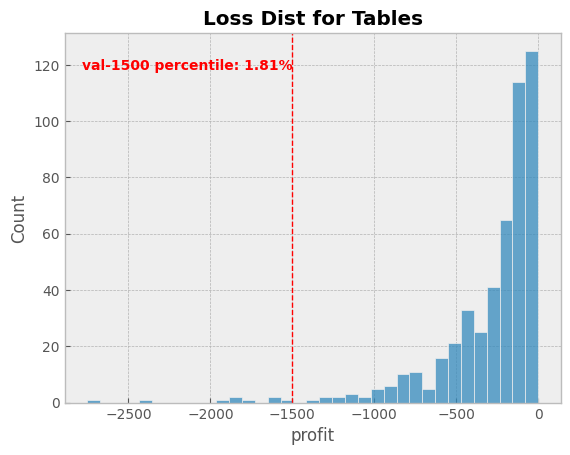

In [47]:
import scipy
sns.histplot(mt['profit'])
plt.title('Loss Dist for Tables',weight='bold')

percentile = scipy.stats.percentileofscore(mt['profit'], -1500)
plt.axvline(-1500, color='red', linestyle='dashed', linewidth=1)
plt.text(-1500, plt.ylim()[1]*0.9, f'val-1500 percentile: {percentile:.2f}%', color='red', ha='right',weight='bold')

<Axes: xlabel='uni_cost', ylabel='profit'>

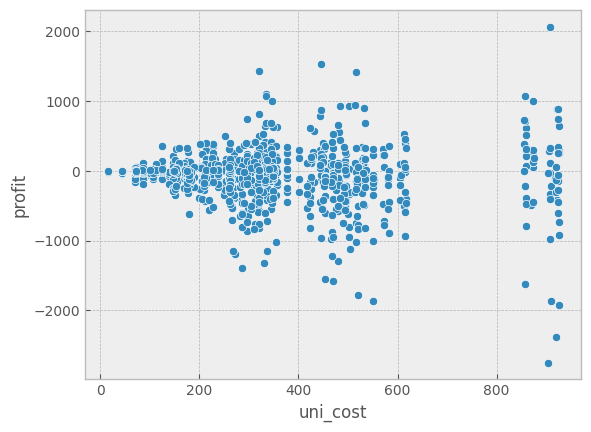

In [48]:
sns.scatterplot(data=data.loc[data['sub_category']=='Tables'],x='uni_cost',y='profit')

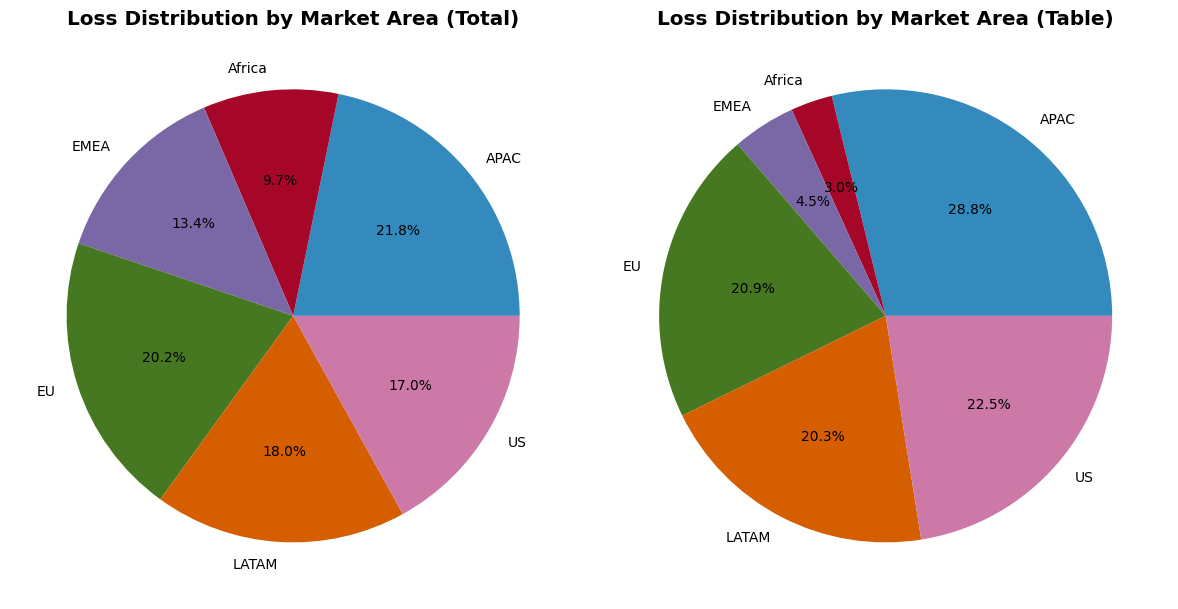

In [50]:
# Assuming 'minus' and 'mt' are your DataFrames
minus_profit = minus.groupby('market_area')['profit'].sum()
mt_profit = mt.groupby('market_area')['profit'].sum()

# Combine the data into a single DataFrame
combined_data = pd.DataFrame({
    'Loss(Total)': -minus_profit,
    'Loss(Table)': -mt_profit
})
# Create a pie chart for each dataset
plt.figure(figsize=(12, 6))

# Pie chart for 'minus' dataset
plt.subplot(1, 2, 1)
plt.pie(combined_data['Loss(Total)'], labels=combined_data.index, autopct='%1.1f%%')
plt.title("Loss Distribution by Market Area (Total)", weight='bold')

# Pie chart for 'mt' dataset
plt.subplot(1, 2, 2)
plt.pie(combined_data['Loss(Table)'], labels=combined_data.index, autopct='%1.1f%%')
plt.title("Loss Distribution by Market Area (Table)", weight='bold')

plt.tight_layout()
plt.show()


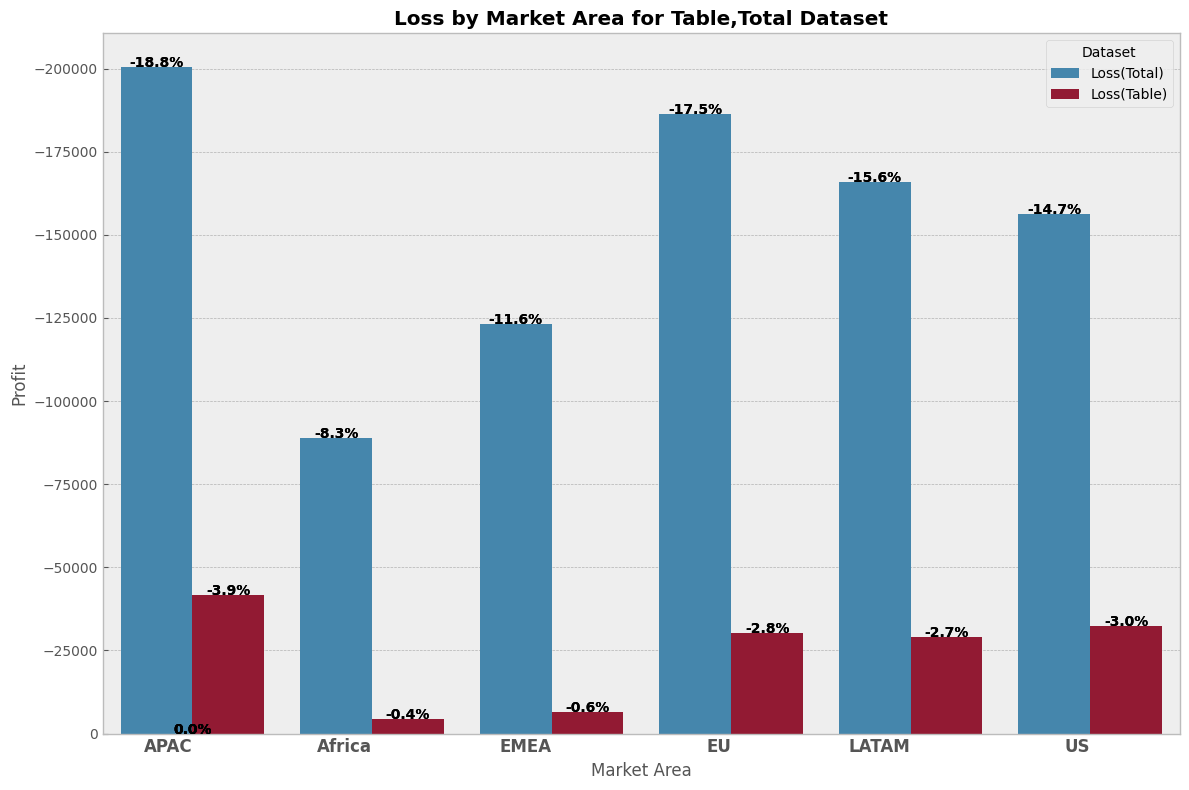

In [51]:
# Assuming 'minus' and 'mt' are your DataFrames
minus_profit = minus.groupby('market_area')['profit'].sum().sort_values(ascending=True)
mt_profit = mt.groupby('market_area')['profit'].sum().sort_values(ascending=True)

# Combine the data into a single DataFrame
combined_data = pd.DataFrame({
    'Loss(Total)': minus_profit,
    'Loss(Table)': mt_profit
}).reset_index()

# Melt the DataFrame to create a "long" format suitable for seaborn
melted_data = pd.melt(combined_data, id_vars=['market_area'], var_name='dataset', value_name='profit')

# Create the plot
plt.figure(figsize=(12, 8))
ax=  sns.barplot(x='market_area', y='profit', hue='dataset', data=melted_data)
ax.invert_yaxis()
plt.title("Loss by Market Area for Table,Total Dataset",weight='bold')
# 각 바의 상단 중앙에 비율 표시
for p in ax.patches:
    height = p.get_height()
    total = melted_data['profit'].abs().sum()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{percentage:.1f}%', ha="center", weight='bold')
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')
plt.xlabel("Market Area")
plt.ylabel("Profit")
plt.xticks(rotation=0, ha='right',weight='bold',fontsize=12)
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()


### Profit Analysis

In [52]:
plus = data.loc[data['profit']>0]
plus.shape

(38078, 27)

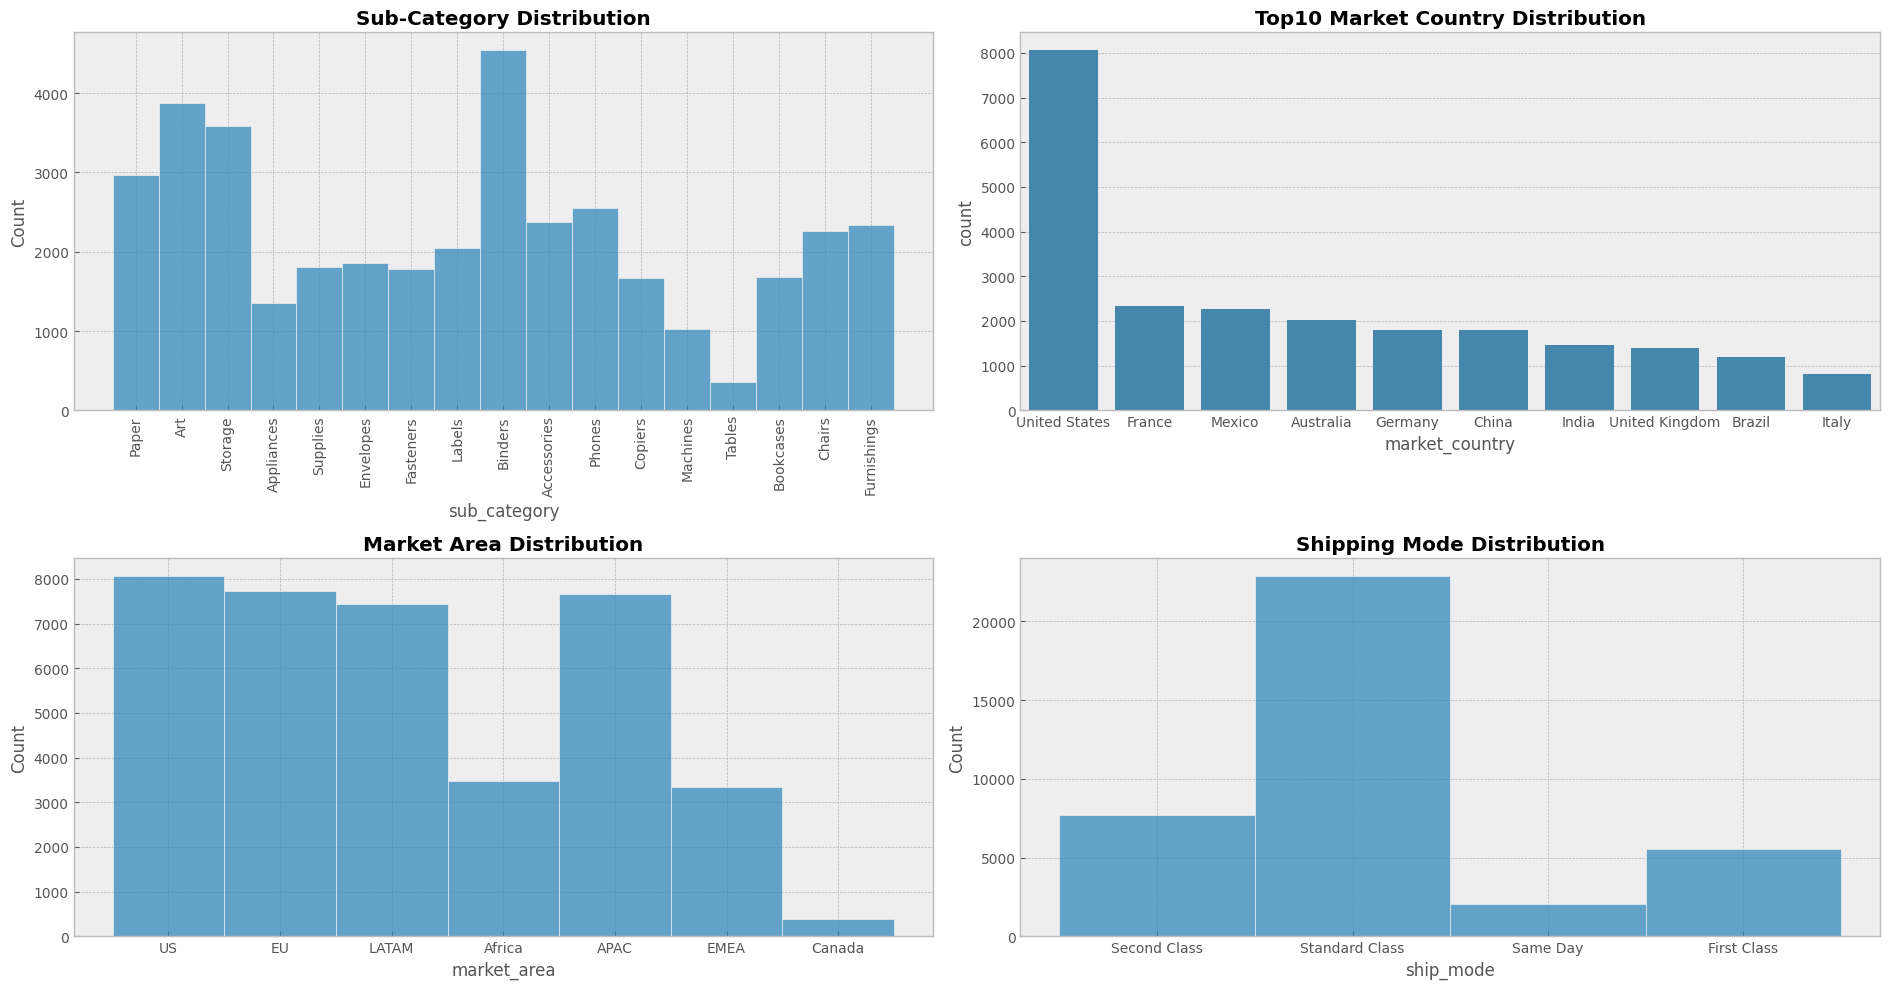

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(19, 10))
axes=axes.flatten()

# Plot for 'market_area'
sns.histplot(plus['sub_category'], ax=axes[0])
axes[0].set_title('Sub-Category Distribution', weight='bold', loc='center')
axes[0].tick_params(axis='x',rotation=90)

# Plot for 'market_country'
sns.barplot(plus['market_country'].value_counts()[:10], ax=axes[1])
axes[1].set_title('Top10 Market Country Distribution', weight='bold', loc='center')

# Plot for 'market_area'
sns.histplot(plus['market_area'], ax=axes[2])
axes[2].set_title('Market Area Distribution', weight='bold', loc='center')
 
# Plot for 'ship_mode'
sns.histplot(plus['ship_mode'], ax=axes[3])
axes[3].set_title('Shipping Mode Distribution', weight='bold', loc='center')

plt.tight_layout()

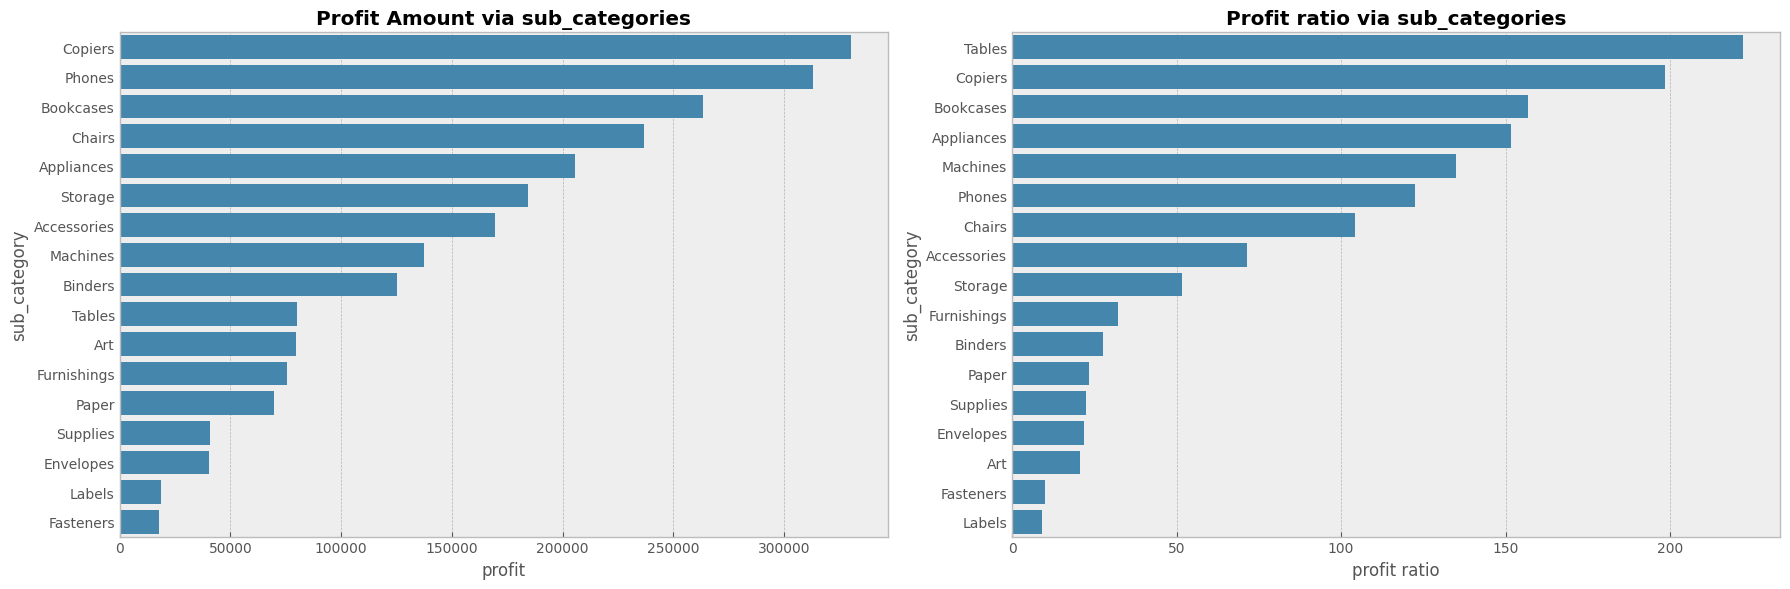

In [54]:
plus_ratio = plus.groupby('sub_category')['profit'].sum() / plus['sub_category'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프
sns.barplot(plus.groupby('sub_category')['profit'].sum().sort_values(ascending=False), orient='h', ax=axes[0])
axes[0].set_title('Profit Amount via sub_categories', weight='bold')

# 두 번째 그래프
sns.barplot(plus_ratio.sort_values(ascending=False), orient='h', ax=axes[1])
axes[1].set_title('Profit ratio via sub_categories', weight='bold')
axes[1].set_xlabel('profit ratio')
plt.tight_layout()

In [55]:
len(data.loc[data['sub_category']=='Tables'])

861

### 다변량 분석

Text(0.5, 0, 'profit ratio')

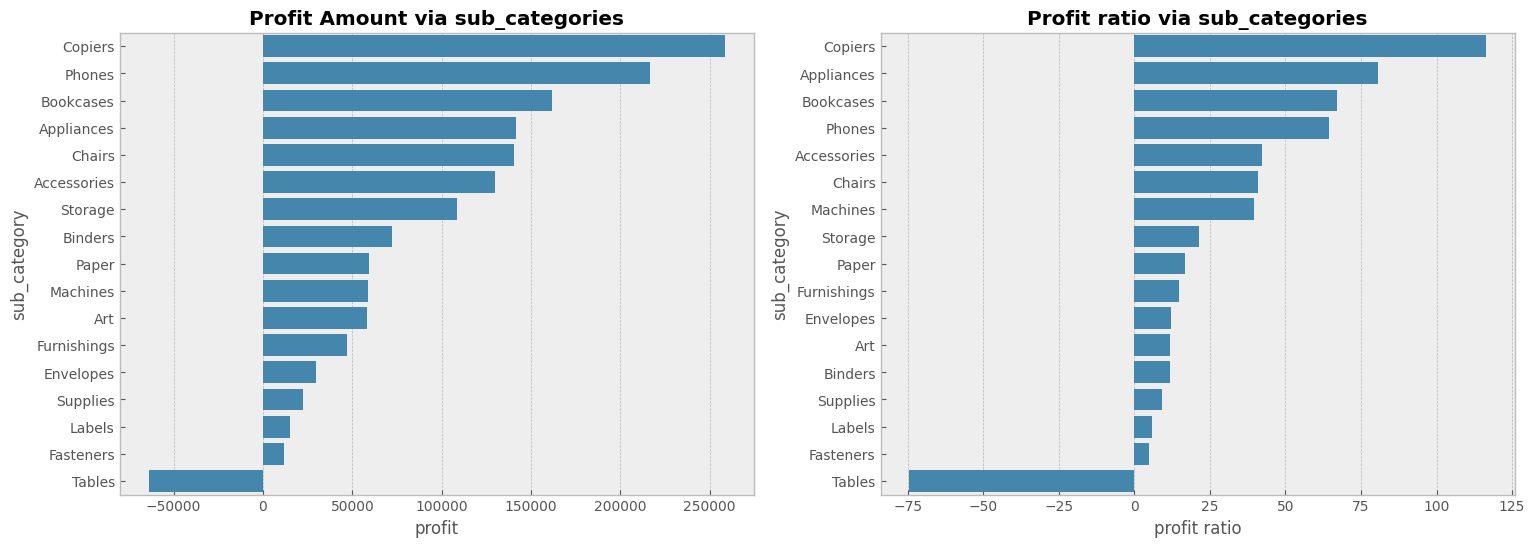

In [56]:
ratio = data.groupby('sub_category')['profit'].sum() / data['sub_category'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프
sns.barplot(data.groupby('sub_category')['profit'].sum().sort_values(ascending=False), orient='h', ax=axes[0])
axes[0].set_title('Profit Amount via sub_categories', weight='bold')

# 두 번째 그래프
sns.barplot(ratio.sort_values(ascending=False), orient='h', ax=axes[1])
axes[1].set_title('Profit ratio via sub_categories', weight='bold')
axes[1].set_xlabel('profit ratio')

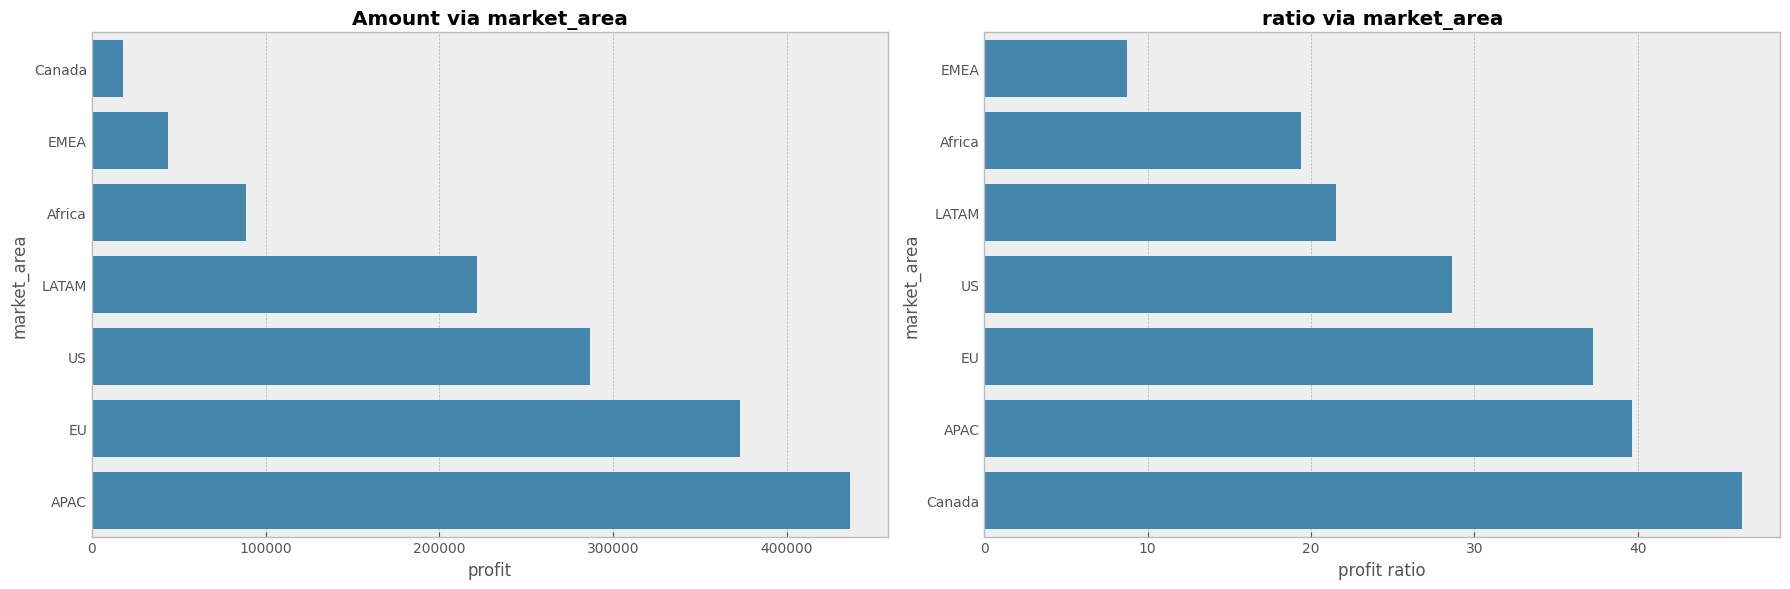

In [57]:
ratio = data.groupby('market_area')['profit'].sum() / data['market_area'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프
sns.barplot(data.groupby('market_area')['profit'].sum().sort_values(ascending=True), orient='h', ax=axes[0])
axes[0].set_title('Amount via market_area', weight='bold')

# 두 번째 그래프
sns.barplot(ratio.sort_values(), orient='h', ax=axes[1])
axes[1].set_title('ratio via market_area', weight='bold')
axes[1].set_xlabel('profit ratio')
plt.tight_layout()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28792\4242094605.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12, fontweight='bold')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28792\4242094605.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=12, fontweight='bold')


[Text(0, 0, 'Tables'),
 Text(0, 1, 'Machines'),
 Text(0, 2, 'Bookcases'),
 Text(0, 3, 'Appliances'),
 Text(0, 4, 'Copiers'),
 Text(0, 5, 'Phones'),
 Text(0, 6, 'Chairs'),
 Text(0, 7, 'Storage'),
 Text(0, 8, 'Accessories'),
 Text(0, 9, 'Furnishings'),
 Text(0, 10, 'Binders'),
 Text(0, 11, 'Supplies'),
 Text(0, 12, 'Envelopes'),
 Text(0, 13, 'Art'),
 Text(0, 14, 'Paper'),
 Text(0, 15, 'Fasteners'),
 Text(0, 16, 'Labels')]

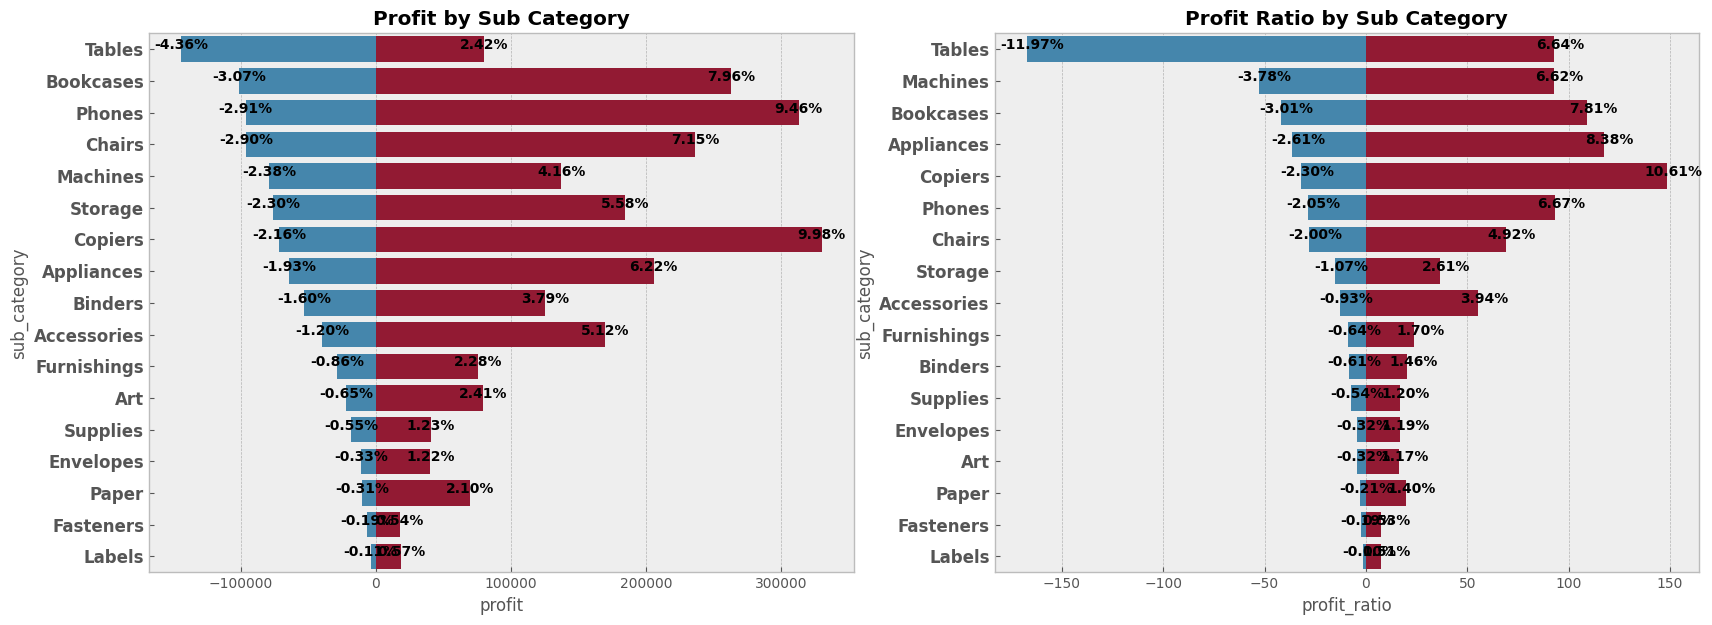

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
axes=axes.flatten()

sns.barplot(minus.groupby('sub_category')['profit'].sum().sort_values(ascending=True), orient='h',ax=axes[0])
sns.barplot(plus.groupby('sub_category')['profit'].sum().sort_values(ascending=True), orient='h',ax=axes[0])
axes[0].set_title('Profit by Sub Category', weight='bold')
axes[0].set_xlabel('profit')
total_minus = minus['profit'].sum()
total_plus = plus['profit'].sum()
total = total_plus - total_minus

for p in axes[0].patches:
    width = p.get_width()
    if width < 0:
        percentage = width / total * 100
    else:
        percentage = width / total * 100
    axes[0].text(width + 3, p.get_y() + p.get_height() / 2., f'{percentage:.2f}%', ha='center', weight='bold')
axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12, fontweight='bold')


minus_ratio = minus.groupby('sub_category')['profit'].sum() / data['sub_category'].value_counts()
plus_ratio = plus.groupby('sub_category')['profit'].sum() / data['sub_category'].value_counts()
total_ratio = plus_ratio - minus_ratio

sns.barplot(minus_ratio.sort_values(ascending=True),orient='h',ax=axes[1])
sns.barplot(plus_ratio.sort_values(ascending=True), orient='h',ax=axes[1])
axes[1].set_title('Profit Ratio by Sub Category', weight='bold')
axes[1].set_xlabel('profit_ratio')
for p in axes[1].patches:
    width = p.get_width()
    if width < 0:
        percentage = width / total_ratio.sum() * 100
    else:
        percentage = width / total_ratio.sum() * 100
    axes[1].text(width + 3, p.get_y() + p.get_height() / 2., f'{percentage:.2f}%', ha='center', weight='bold')
axes[1].set_yticklabels(axes[1].get_yticklabels(), fontsize=12, fontweight='bold')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28792\4026408537.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12, fontweight='bold')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28792\4026408537.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(axes[0].get_yticklabels(), fontsize=12, fontweight='bold')


[Text(0, 0, 'APAC'),
 Text(0, 1, 'EU'),
 Text(0, 2, 'LATAM'),
 Text(0, 3, 'US'),
 Text(0, 4, 'EMEA'),
 Text(0, 5, 'Africa'),
 Text(0, 6, 'Canada')]

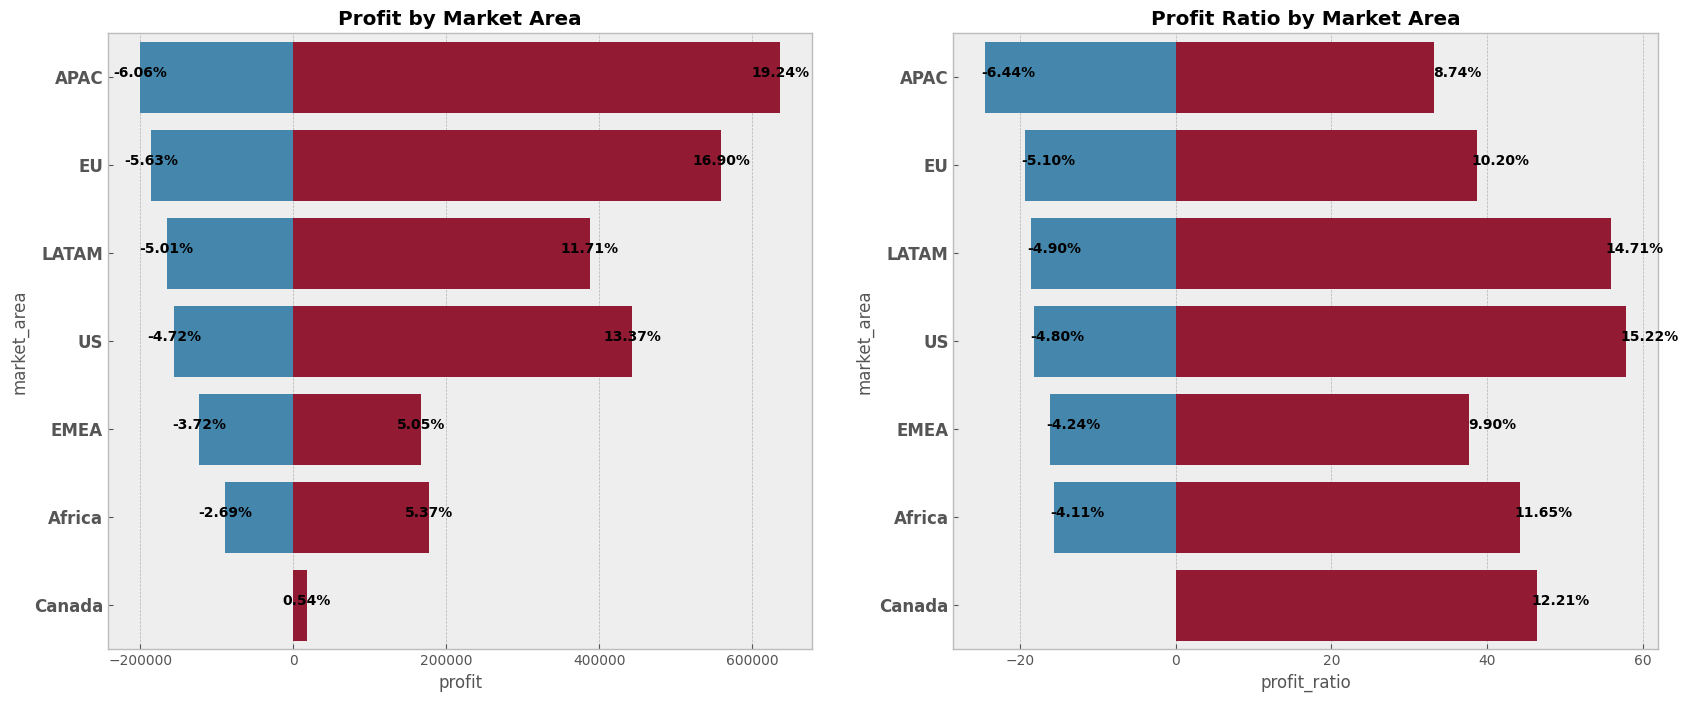

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes=axes.flatten()

sns.barplot(minus.groupby('market_area')['profit'].sum().sort_values(ascending=True), orient='h',ax=axes[0])
sns.barplot(plus.groupby('market_area')['profit'].sum().sort_values(ascending=True), orient='h',ax=axes[0])
axes[0].set_title('Profit by Market Area', weight='bold')
axes[0].set_xlabel('profit')
total_minus = minus['profit'].sum()
total_plus = plus['profit'].sum()
total = total_plus - total_minus

for p in axes[0].patches:
    width = p.get_width()
    if width < 0:
        percentage = width / total * 100
    else:
        percentage = width / total * 100
    axes[0].text(width + 3, p.get_y() + p.get_height() / 2., f'{percentage:.2f}%', ha='center', weight='bold')

axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12, fontweight='bold')


minus_ratio = minus.groupby('market_area')['profit'].sum() / data['market_area'].value_counts()
plus_ratio = plus.groupby('market_area')['profit'].sum() / data['market_area'].value_counts()
total_ratio = plus_ratio - minus_ratio

sns.barplot(minus_ratio.sort_values(ascending=True),orient='h',ax=axes[1])
sns.barplot(plus_ratio.sort_values(ascending=True), orient='h',ax=axes[1])
axes[1].set_title('Profit Ratio by Market Area', weight='bold')
axes[1].set_xlabel('profit_ratio')
for p in axes[1].patches:
    width = p.get_width()
    if width < 0:
        percentage = width / total_ratio.sum() * 100
    else:
        percentage = width / total_ratio.sum() * 100
    axes[1].text(width + 3, p.get_y() + p.get_height() / 2., f'{percentage:.2f}%', ha='center', weight='bold')
axes[1].set_yticklabels(axes[0].get_yticklabels(), fontsize=12, fontweight='bold')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28792\2709711650.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12, fontweight='bold')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28792\2709711650.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(axes[0].get_yticklabels(), fontsize=12, fontweight='bold')


[Text(0, 0, 'Central'),
 Text(0, 1, 'South'),
 Text(0, 2, 'EMEA'),
 Text(0, 3, 'Southeast Asia'),
 Text(0, 4, 'Africa'),
 Text(0, 5, 'Oceania'),
 Text(0, 6, 'North'),
 Text(0, 7, 'East'),
 Text(0, 8, 'Central Asia'),
 Text(0, 9, 'North Asia'),
 Text(0, 10, 'Caribbean'),
 Text(0, 11, 'West'),
 Text(0, 12, 'Canada')]

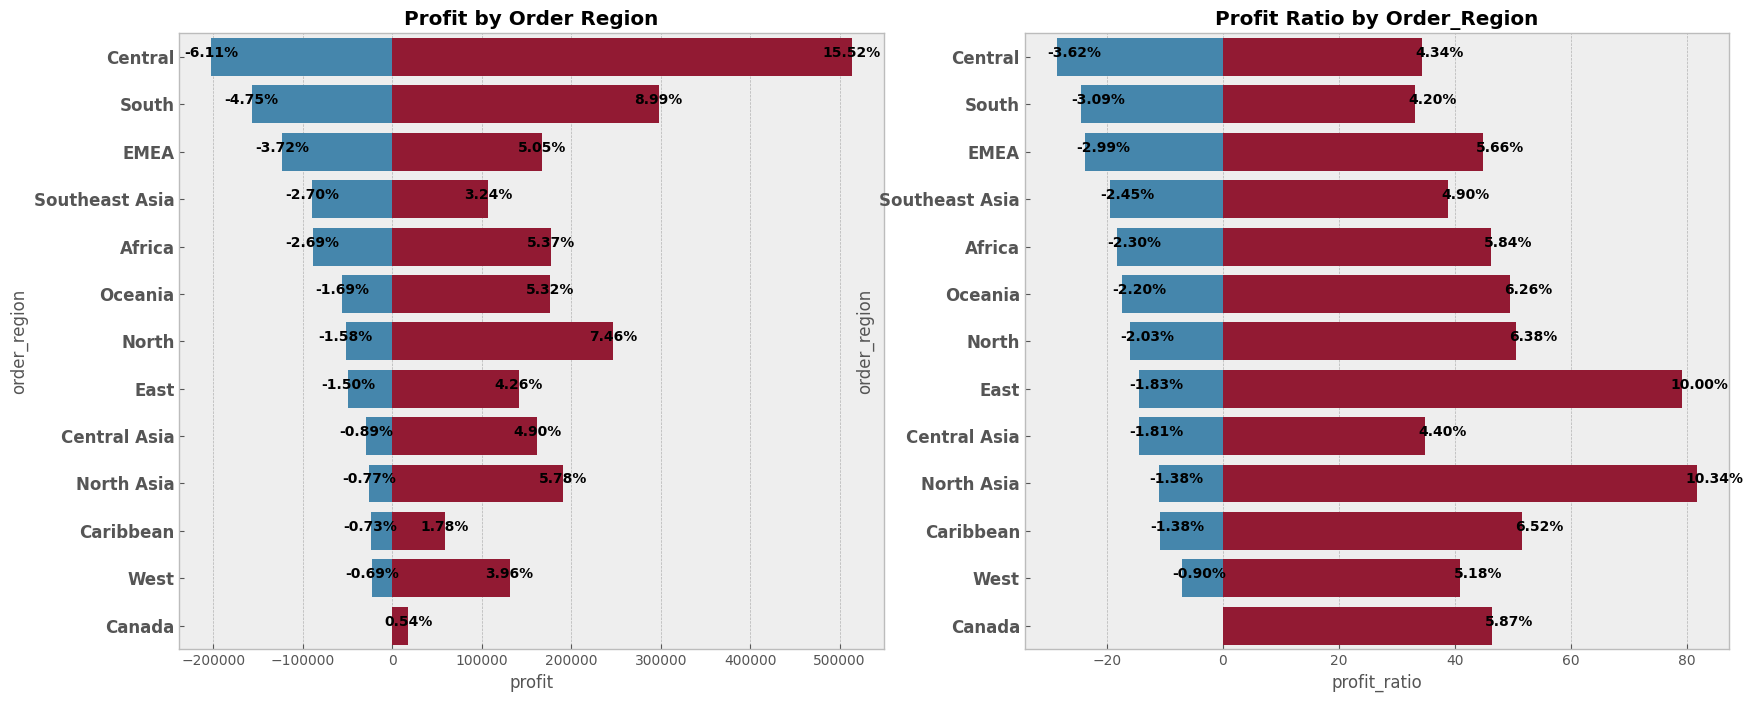

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes=axes.flatten()

sns.barplot(minus.groupby('order_region')['profit'].sum().sort_values(ascending=True), orient='h',ax=axes[0])
sns.barplot(plus.groupby('order_region')['profit'].sum().sort_values(ascending=True), orient='h',ax=axes[0])
axes[0].set_title('Profit by Order Region', weight='bold')
axes[0].set_xlabel('profit')
total_minus = minus['profit'].sum()
total_plus = plus['profit'].sum()
total = total_plus - total_minus

for p in axes[0].patches:
    width = p.get_width()
    if width < 0:
        percentage = width / total * 100
    else:
        percentage = width / total * 100
    axes[0].text(width + 3, p.get_y() + p.get_height() / 2., f'{percentage:.2f}%', ha='center', weight='bold')

axes[0].set_yticklabels(axes[0].get_yticklabels(), fontsize=12, fontweight='bold')


minus_ratio = minus.groupby('order_region')['profit'].sum() / data['order_region'].value_counts()
plus_ratio = plus.groupby('order_region')['profit'].sum() / data['order_region'].value_counts()
total_ratio = plus_ratio - minus_ratio

sns.barplot(minus_ratio.sort_values(ascending=True),orient='h',ax=axes[1])
sns.barplot(plus_ratio.sort_values(ascending=True), orient='h',ax=axes[1])
axes[1].set_title('Profit Ratio by Order_Region', weight='bold')
axes[1].set_xlabel('profit_ratio')
for p in axes[1].patches:
    width = p.get_width()
    if width < 0:
        percentage = width / total_ratio.sum() * 100
    else:
        percentage = width / total_ratio.sum() * 100
    axes[1].text(width + 3, p.get_y() + p.get_height() / 2., f'{percentage:.2f}%', ha='center', weight='bold')
axes[1].set_yticklabels(axes[0].get_yticklabels(), fontsize=12, fontweight='bold')

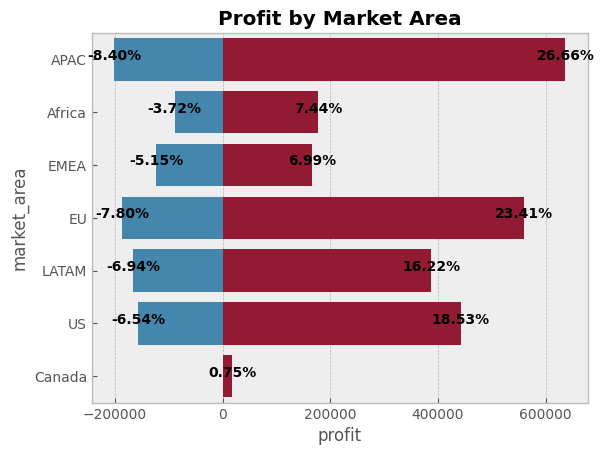

In [61]:
ax = sns.barplot(minus.groupby('market_area')['profit'].sum(), orient='h')
ax.set_title('Minus Profit by Market Area', weight='bold')
total_minus_profit = minus['profit'].sum()

bx = sns.barplot(plus.groupby('market_area')['profit'].sum(), orient='h')
bx.set_title('Profit by Market Area', weight='bold')
# 각 바의 상단 중앙에 비율 표시
total_plus_profit = plus['profit'].sum()
for p in bx.patches:
    width = p.get_width()
    percentage = width / total_plus_profit * 100
    bx.text(width + 3, p.get_y() + p.get_height() / 2., f'{percentage:.2f}%', ha="center", weight='bold')

### 2. Discount

Text(0.5, 1.0, 'regplot btw profit-Discount')

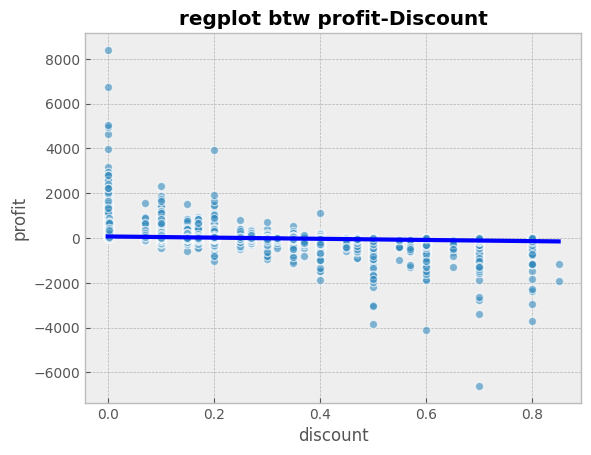

In [62]:
sns.regplot(x=data['discount'],y=data['profit'],line_kws={'color':'blue'},scatter_kws=dict(alpha=0.6,edgecolors='white'),ci=False)
plt.title('regplot btw profit-Discount',weight='bold')

In [63]:
dif = data.loc[data['discount'] > 0.4]

In [64]:
dif['name_short'] = [i.split(' ')[0] for i in dif['product_name']]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_28792\2996290140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dif['name_short'] = [i.split(' ')[0] for i in dif['product_name']]


In [65]:
# 전체 이익 / 손실에서 차지하는 부분
print(plus.loc[plus['discount']>0.4]['profit'].sum() / plus['profit'].sum())
print(minus.loc[minus['discount']>0.4]['profit'].sum() / minus['profit'].sum())

0.00017606274993161973
0.6819465622479012


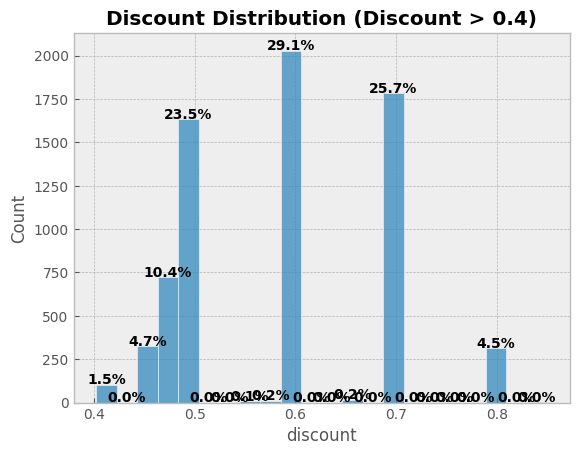

In [66]:
ax = sns.histplot(data['discount'].loc[data['discount']>0.4])
plt.title('Discount Distribution (Discount > 0.4)', weight='bold')

# Calculate total for percentage calculation
total = len(data['discount'].loc[data['discount'] > 0.4])

# Annotate each bar with its percentage
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, f'{height/total:.1%}', ha="center", weight='bold')

plt.show()

In [67]:
data.loc[data['market_city']=='Lagos']['discount'].value_counts()

discount
0.7    333
Name: count, dtype: int64

In [68]:
data.loc[data['market_city']=='Istanbul']['discount'].value_counts()
data.loc[data['market_city']=='Lagos']['discount'].value_counts()
data.loc[data['market_city']=='Texas']['discount'].value_counts().sort_values(ascending=False)

discount
0.20    570
0.80    200
0.30     94
0.60     81
0.32     27
0.40     13
Name: count, dtype: int64

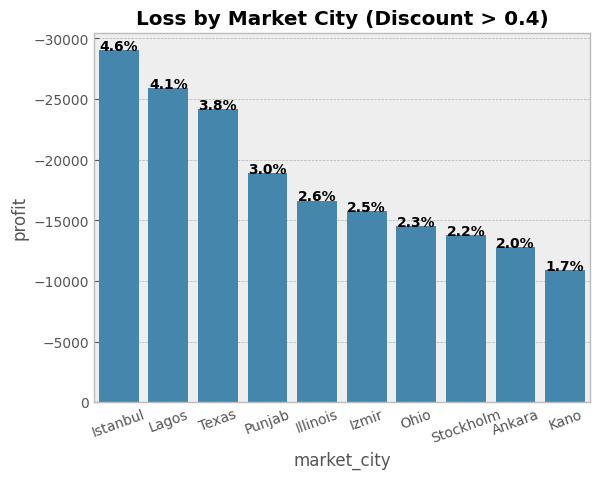

In [69]:
ax = sns.barplot(minus.loc[minus['discount']>0.4].groupby('market_city')['profit'].sum().sort_values()[:10])
ax.invert_yaxis()
plt.title('Loss by Market City (Discount > 0.4)',weight='bold')
total = minus.loc[minus['discount'] > 0.4]['profit'].sum()
ax.tick_params(axis='x',rotation=20)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width() / 2., height, f'{percentage:.1f}%', ha="center", weight='bold')

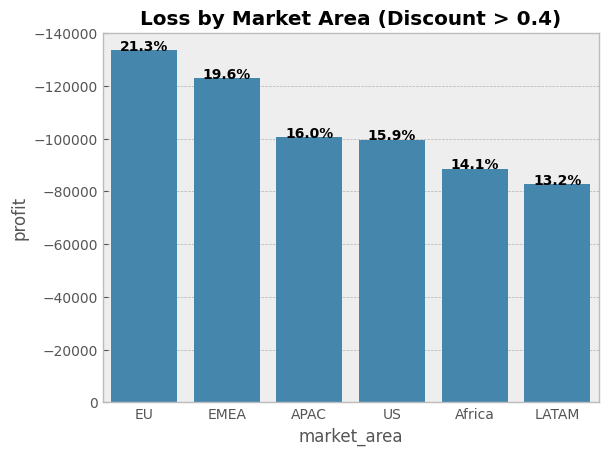

In [70]:
ax = sns.barplot(minus.loc[minus['discount']>0.4].groupby('market_area')['profit'].sum().sort_values())
ax.invert_yaxis()
plt.title('Loss by Market Area (Discount > 0.4)',weight='bold')
total = minus.loc[minus['discount'] > 0.4]['profit'].sum()
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width() / 2., height, f'{percentage:.1f}%', ha="center", weight='bold')

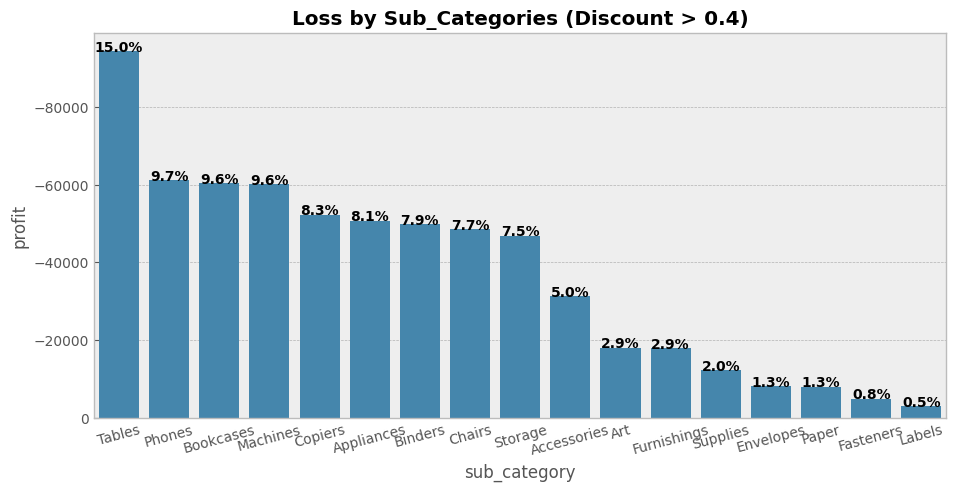

In [71]:
plt.figure(figsize=(11,5))
ax = sns.barplot(minus.loc[minus['discount']>0.4].groupby('sub_category')['profit'].sum().sort_values())
ax.invert_yaxis()
ax.tick_params(axis='x',rotation=15)
plt.title('Loss by Sub_Categories (Discount > 0.4)',weight='bold')
total = minus.loc[minus['discount'] > 0.4]['profit'].sum()
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width() / 2., height, f'{percentage:.1f}%', ha="center", weight='bold')

Text(0.5, 1.0, 'Discount by Market Area for Loss Data')

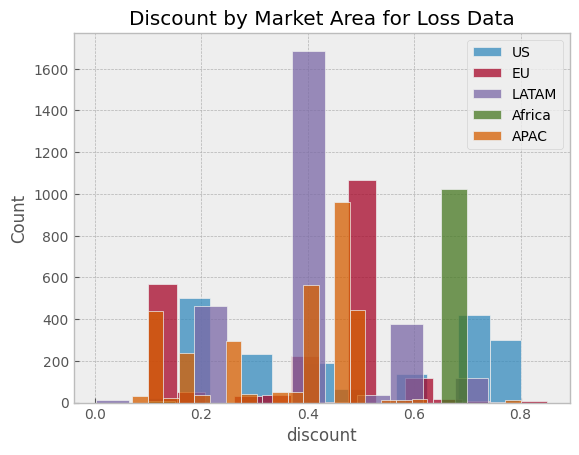

In [72]:
for i in data['market_area'].unique()[:5]:
    sns.histplot(x=minus['discount'].loc[minus['market_area']==i],label=i)
plt.legend()
plt.title('Discount by Market Area for Loss Data')

Text(0.5, 1.0, 'Discount by Market Area for Plus Data')

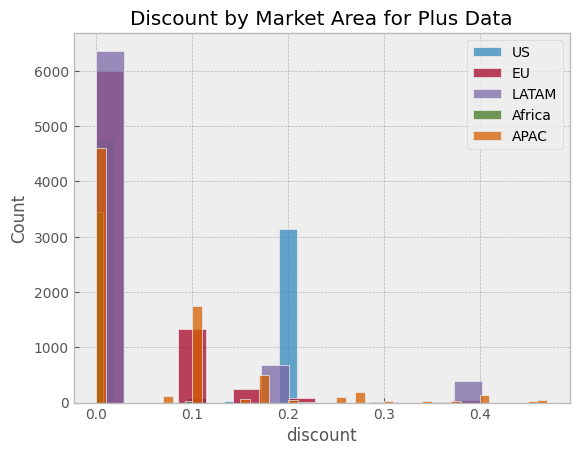

In [73]:
for i in data['market_area'].unique()[:5]:
    sns.histplot(x=plus['discount'].loc[plus['market_area']==i],label=i)
plt.legend()
plt.title('Discount by Market Area for Plus Data')

Text(0.5, 1.0, 'Discount by Sub-Categories for Plus Data')

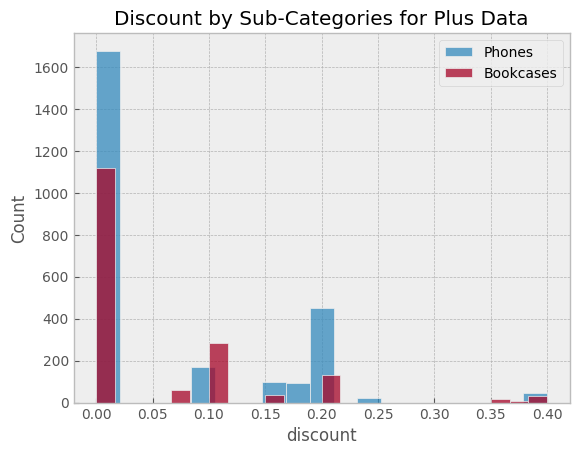

In [74]:
for i in list(['Phones','Bookcases']):
    sns.histplot(x=plus['discount'].loc[plus['sub_category']==i],label=i)
plt.legend()
plt.title('Discount by Sub-Categories for Plus Data')

Text(0.5, 1.0, 'Discount by Sub-Categories for Minus Data')

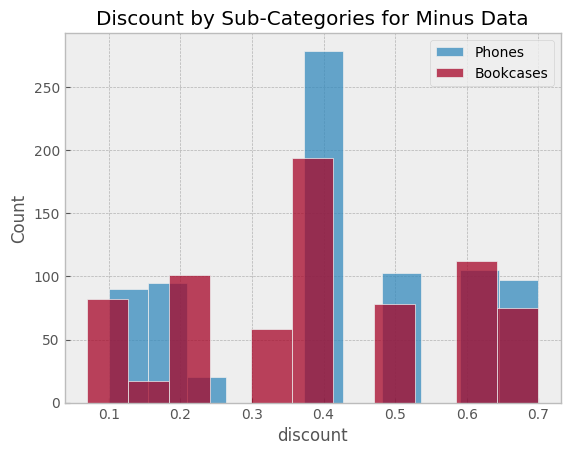

In [75]:
for i in list(['Phones','Bookcases']):
    sns.histplot(x=minus['discount'].loc[minus['sub_category']==i],label=i)
plt.legend()
plt.title('Discount by Sub-Categories for Minus Data')